### Self-Attention mechanism: basic implementation

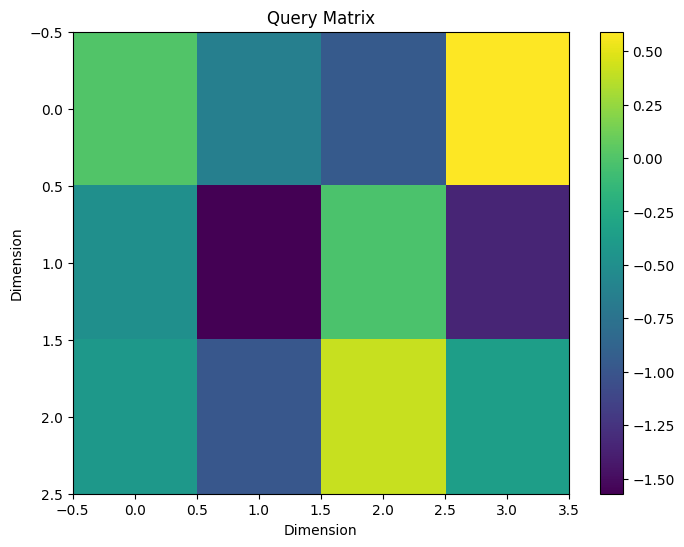

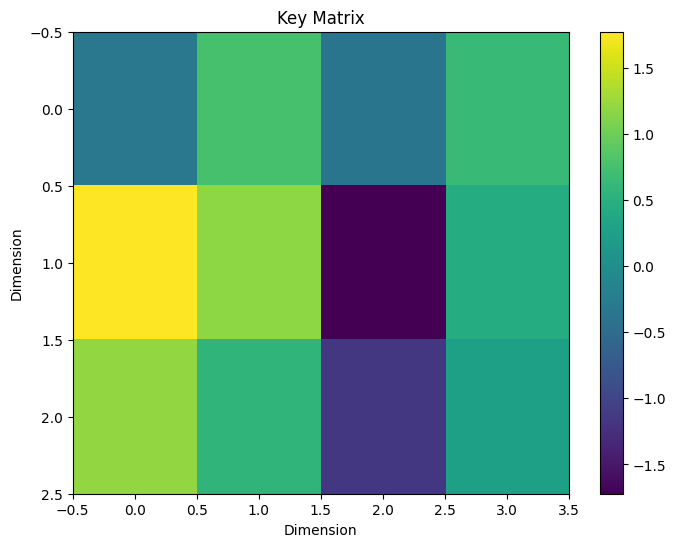

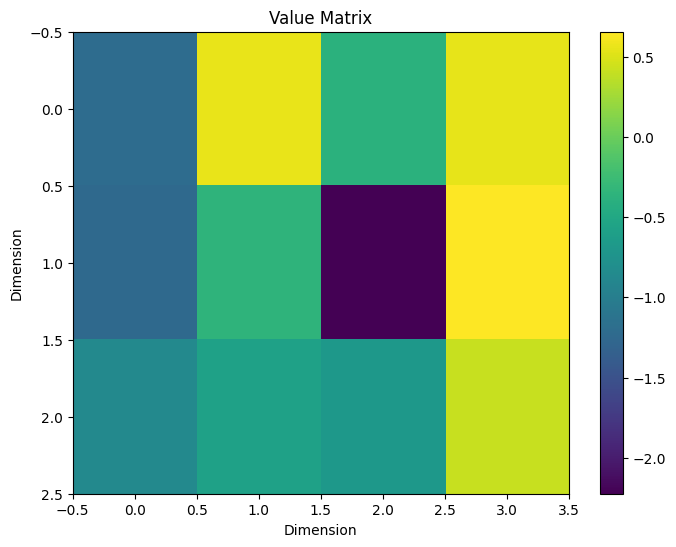

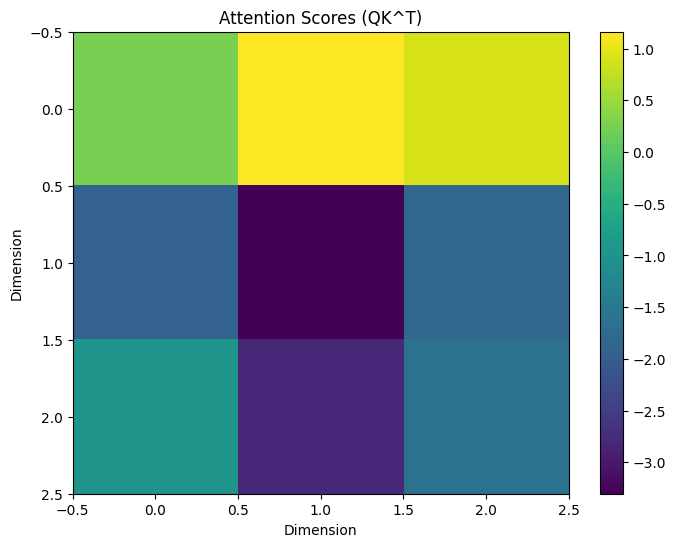

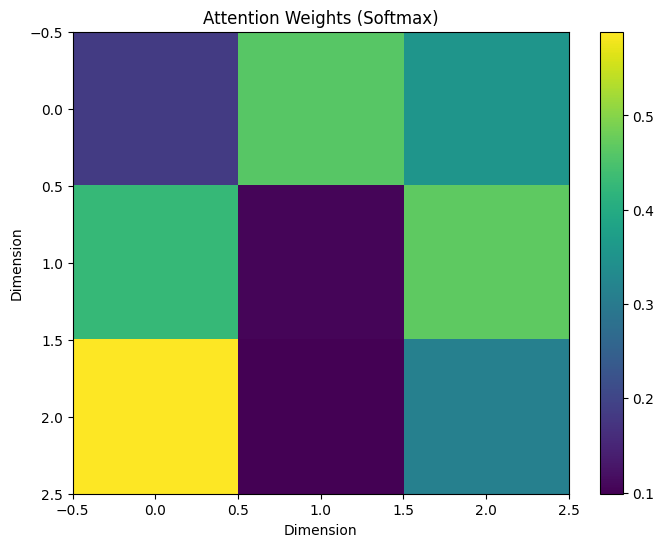

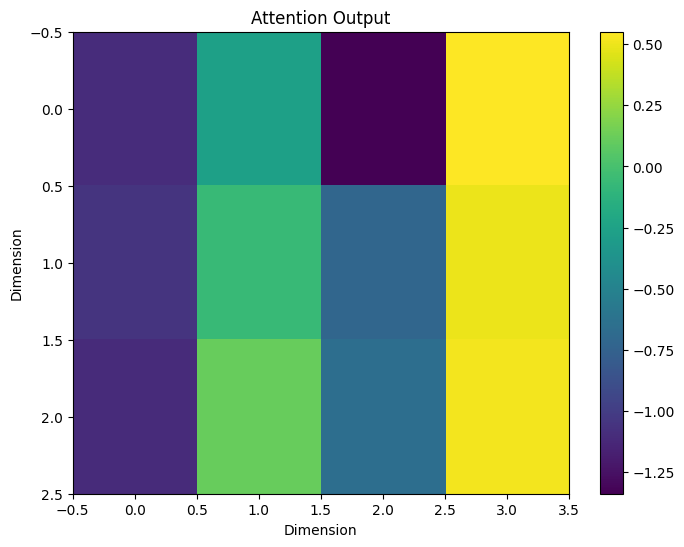

Input Sequence:
 [[1 0 1 0]
 [0 2 1 0]
 [1 1 0 1]]
Query Matrix:
 [[ 0.00320786 -0.63509417 -0.9548698   0.590628  ]
 [-0.4918955  -1.5707897  -0.02419037 -1.350143  ]
 [-0.4199745  -0.9854675   0.40878594 -0.36202586]]
Key Matrix:
 [[-0.32302698  0.7595904  -0.3655048   0.6462525 ]
 [ 1.7769561   1.1856742  -1.7221154   0.4508987 ]
 [ 1.2156527   0.5629686  -1.1497568   0.2608785 ]]
Value Matrix:
 [[-1.2109444   0.55514044 -0.3805743   0.5532931 ]
 [-1.23519    -0.3558507  -2.2242336   0.65510803]
 [-0.8708198  -0.57432824 -0.68430746  0.4143104 ]]
Attention Scores:
 [[ 0.24725673  1.1633948   0.89831173]
 [-1.8979528  -3.3036406  -1.8066895 ]
 [-0.99626184 -2.781933   -1.6297796 ]]
Attention Weights:
 [[0.18459783 0.46142414 0.35397795]
 [0.42721248 0.1047518  0.4680358 ]
 [0.5887874  0.0987305  0.31248215]]
Attention Output:
 [[-1.1017352  -0.26501992 -1.3387979   0.5510761 ]
 [-1.0542939  -0.06891926 -0.71585894  0.49890956]
 [-1.1070553   0.11225903 -0.6575109   0.51991576]]


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Dimension')
    plt.ylabel('Dimension')
    plt.show()

# Input sequence: a matrix where each row represents a feature vector for a sequence element
input_sequence = np.array([[1, 0, 1, 0],
                           [0, 2, 1, 0],
                           [1, 1, 0, 1]])

# Model parameters
d_model = input_sequence.shape[1]  # Dimension of the embeddings
num_heads = 1  # Number of attention heads (single head for simplicity)

# Create query, key, and value matrices using linear transformations (Dense layers)
query = tf.keras.layers.Dense(d_model)(input_sequence)
key = tf.keras.layers.Dense(d_model)(input_sequence)
value = tf.keras.layers.Dense(d_model)(input_sequence)

# Visualize the query, key, and value matrices
plot_matrix(query, "Query Matrix")
plot_matrix(key, "Key Matrix")
plot_matrix(value, "Value Matrix")

# Compute attention scores by performing dot product of queries and transposed keys
scores = tf.matmul(query, key, transpose_b=True)
plot_matrix(scores, "Attention Scores (QK^T)")

# Apply softmax to the scores to obtain attention weights
attention_weights = tf.nn.softmax(scores, axis=-1)
plot_matrix(attention_weights, "Attention Weights (Softmax)")

# Apply attention weights to the values to get the final attention output
attention_output = tf.matmul(attention_weights, value)
plot_matrix(attention_output, "Attention Output")

# Print the results for reference
print("Input Sequence:\n", input_sequence)
print("Query Matrix:\n", query.numpy())
print("Key Matrix:\n", key.numpy())
print("Value Matrix:\n", value.numpy())
print("Attention Scores:\n", scores.numpy())
print("Attention Weights:\n", attention_weights.numpy())
print("Attention Output:\n", attention_output.numpy())

### Self-Attention mechanism: Using a sentence as input

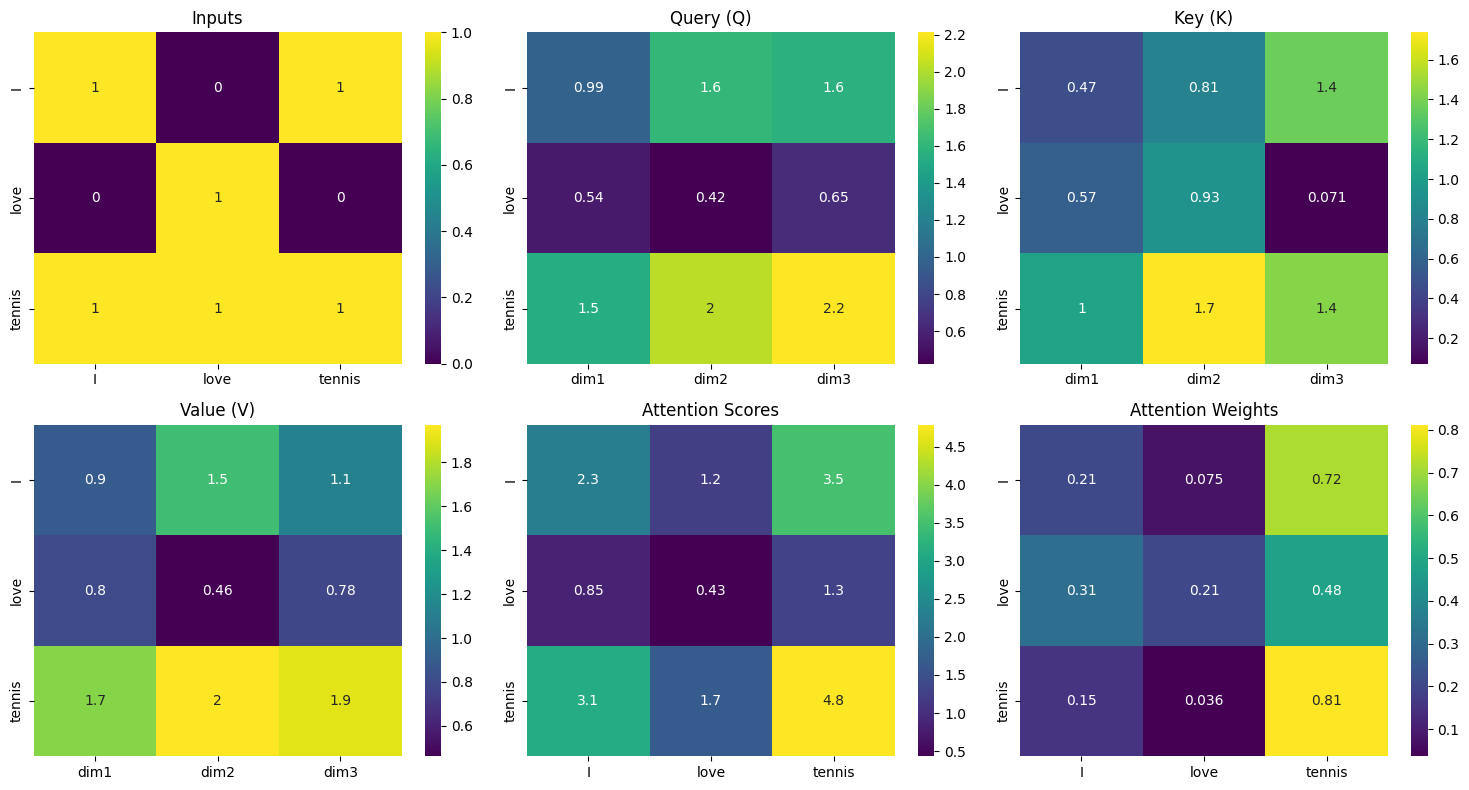

Phrase: ['I', 'love', 'tennis']

Inputs:
 [[1 0 1]
 [0 1 0]
 [1 1 1]]

Query (Q):
 [[0.98640072 1.60696237 1.56642614]
 [0.54488318 0.4236548  0.64589411]
 [1.5312839  2.03061717 2.21232025]]

Key (K):
 [[0.47057082 0.81194344 1.36151477]
 [0.56804456 0.92559664 0.07103606]
 [1.03861538 1.73754007 1.43255082]]

Value (V):
 [[0.89643118 1.50993317 1.12197163]
 [0.79915856 0.46147936 0.78052918]
 [1.69558974 1.97141253 1.90250081]]

Attention Scores:
 [[2.25261651 1.24649419 3.4991107 ]
 [0.85435382 0.43158847 1.28594229]
 [3.10697034 1.67808266 4.78505299]]

Attention Weights:
 [[0.2064511  0.07548555 0.71806334]
 [0.31299554 0.20508481 0.48191965]
 [0.15163339 0.03632761 0.812039  ]]

Output:
 [[1.46293497 1.76216147 1.65666705]
 [1.26161226 1.5173072  1.42809932]
 [1.54184542 1.84658459 1.74338797]]


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Example sentence embeddings (3 dimensions per word)
embeddings = {
    "I": [1, 0, 1],
    "love": [0, 1, 0],
    "tennis": [1, 1, 1]
}

# Convert sentence to sequence of embeddings
sentence = ["I", "love", "tennis"]
inputs = np.array([embeddings[word] for word in sentence])

# Initialize weights for Query, Key, and Value matrices
np.random.seed(0)
Wq = np.random.rand(3, 3)
Wk = np.random.rand(3, 3)
Wv = np.random.rand(3, 3)

# Compute Query, Key, and Value matrices
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

# Compute attention scores
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

# Apply softmax to get attention weights
attention_weights = softmax(scores)

# Compute the output of the self-attention mechanism
output = np.dot(attention_weights, V)

# Plotting the inputs
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 3, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

plt.tight_layout()
plt.show()

print("Phrase:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)

### Self-Attention mechanism: Word embeddings computing

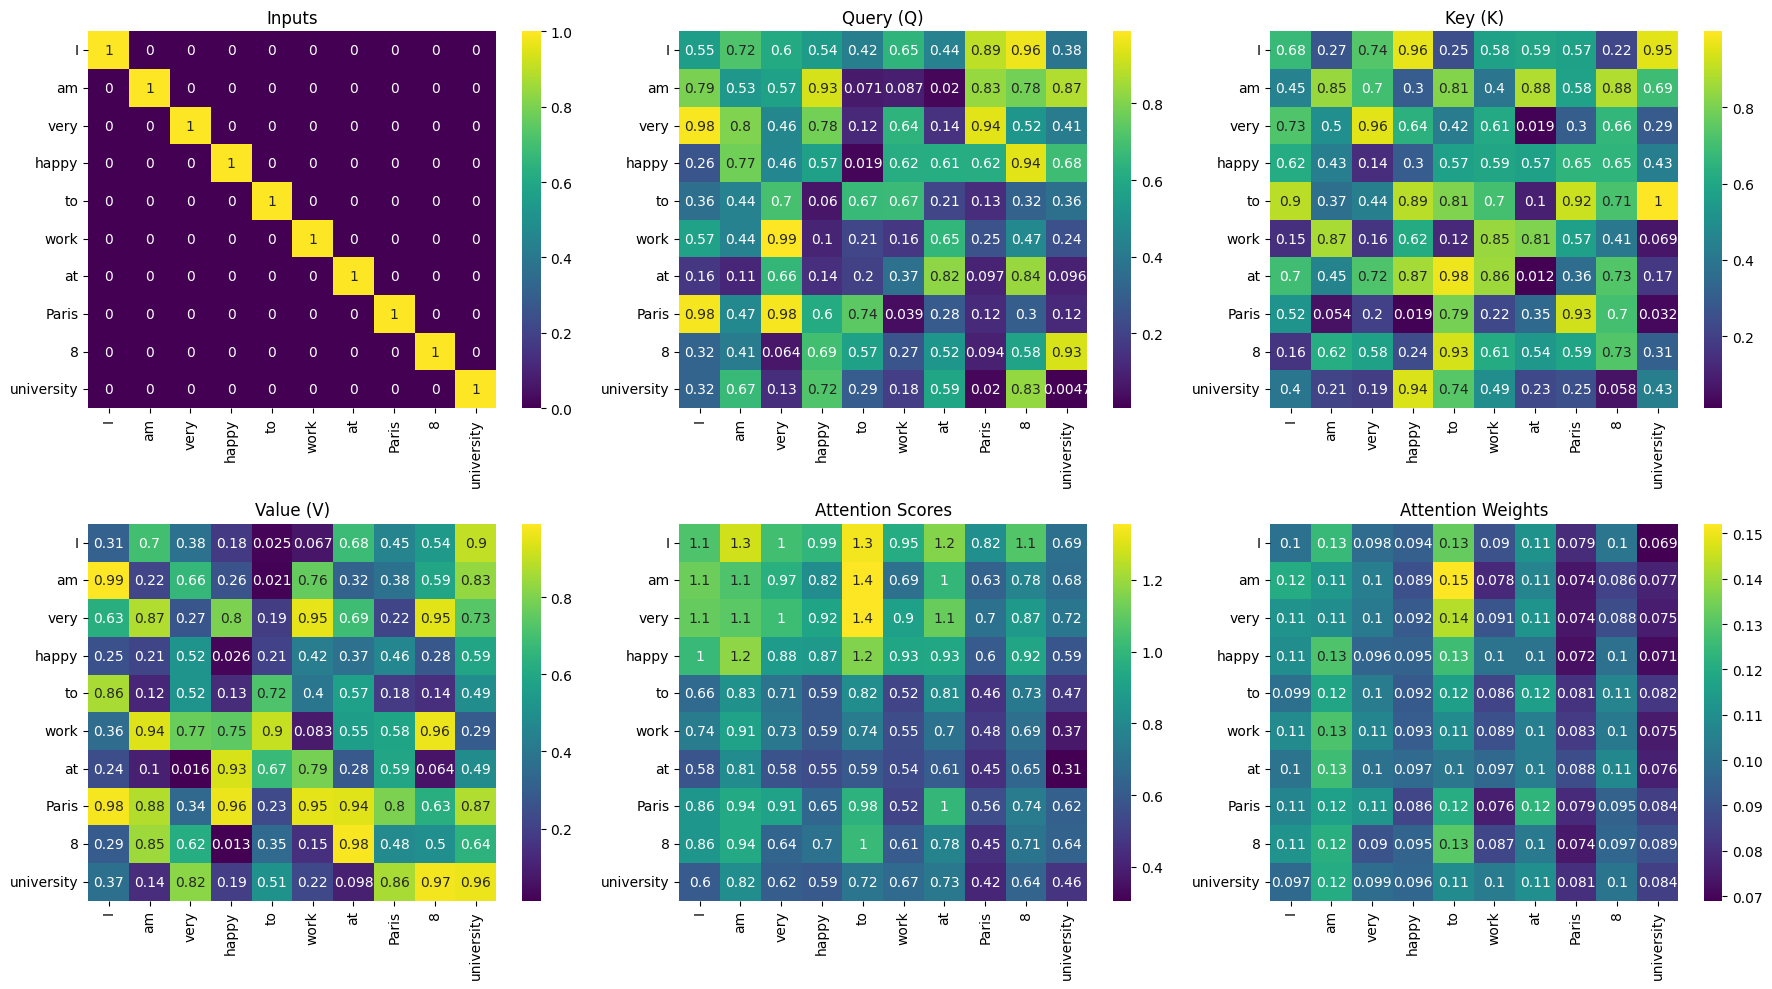

Sentence: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Inputs:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038256 0.1289263  0.3154283

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Tokenize the sentence
sentence = "I am very happy to work at Paris 8 university".split()
vocab_size = len(sentence)

# Create one-hot embeddings for each word
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)

# Convert sentence to sequence of embeddings
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

# Initialize weights for Query, Key, and Value matrices
np.random.seed(0)
Wq = np.random.rand(vocab_size, vocab_size)
Wk = np.random.rand(vocab_size, vocab_size)
Wv = np.random.rand(vocab_size, vocab_size)

# Compute Query, Key, and Value matrices
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

# Compute attention scores
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

# Apply softmax to get attention weights
attention_weights = softmax(scores)

# Compute the output of the self-attention mechanism
output = np.dot(attention_weights, V)

# Visualization
plt.figure(figsize=(18, 10))

# Plotting the inputs
plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 3, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

plt.tight_layout()
plt.show()

print("Sentence:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)

### Complete Encoder Implementation

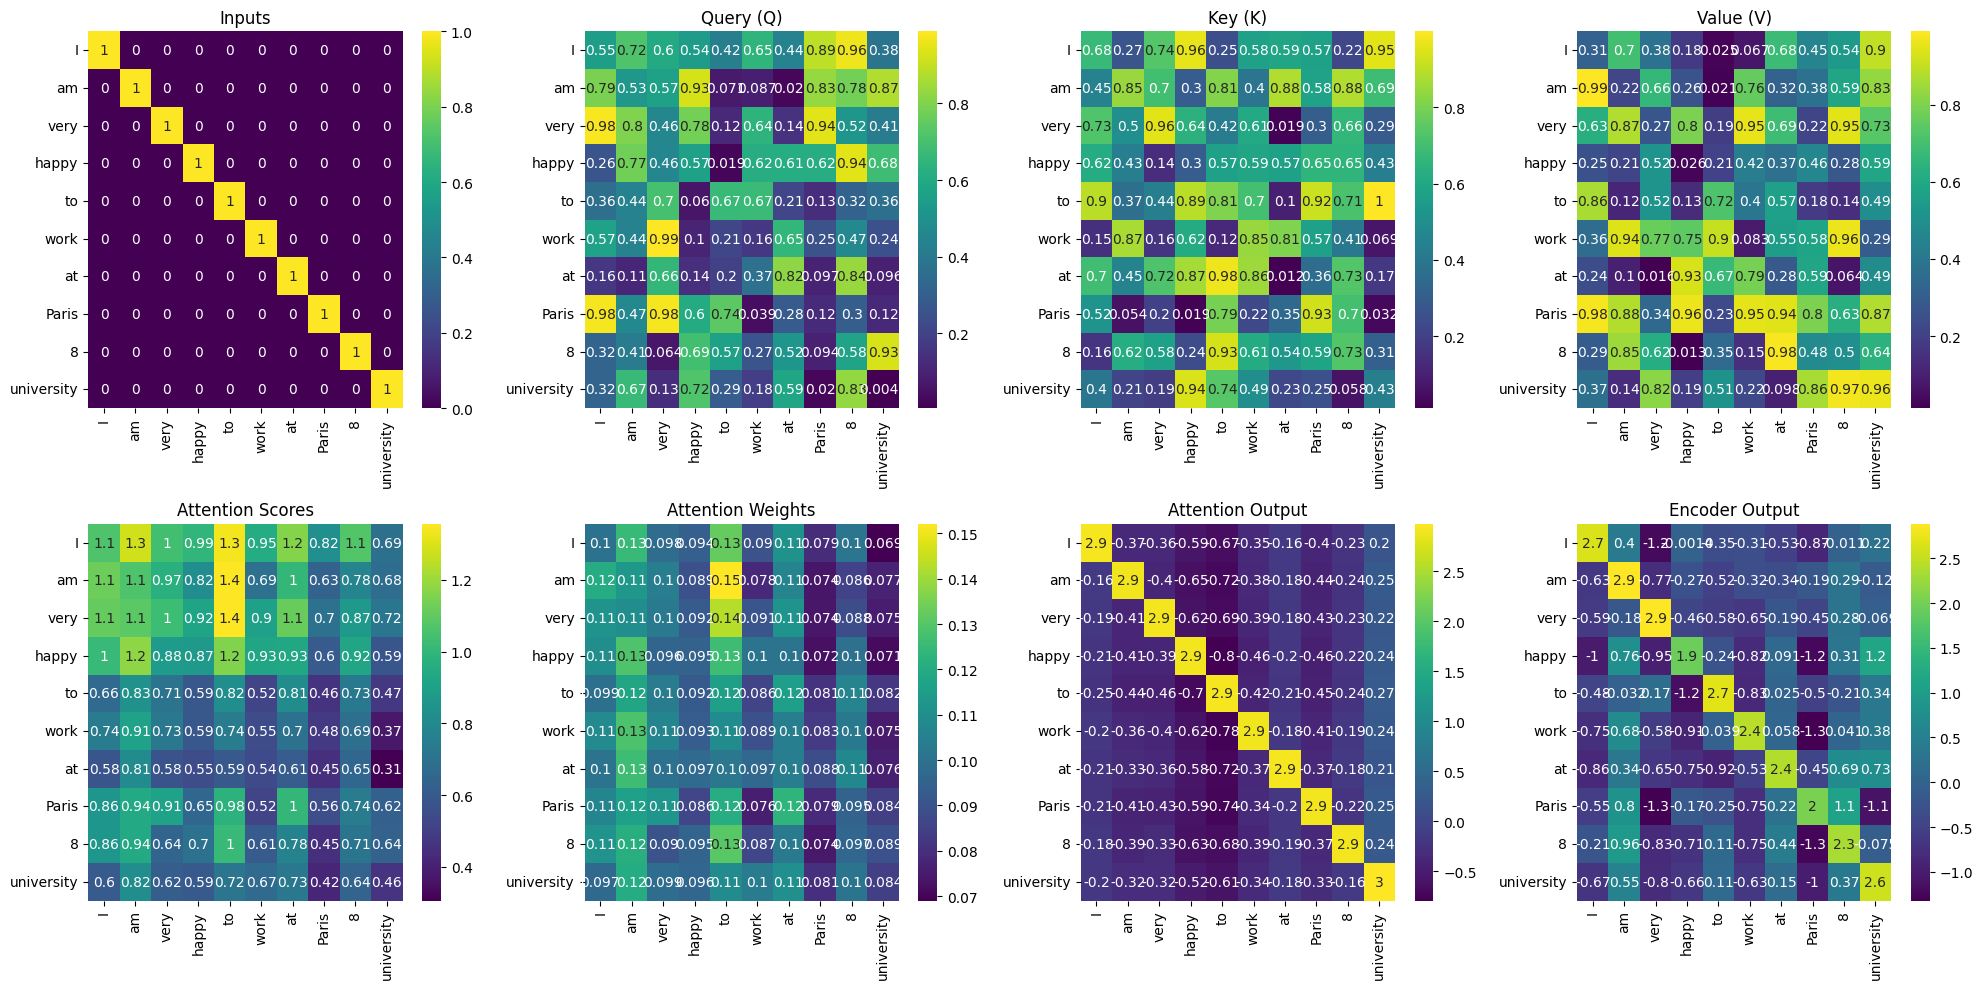

Sentence: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Inputs:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038256 0.1289263  0.3154283

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Tokenize the sentence
sentence = "I am very happy to work at Paris 8 university".split()
vocab_size = len(sentence)

# Create one-hot embeddings for each word
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)

# Convert sentence to sequence of embeddings
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
np.random.seed(0)
Wq = np.random.rand(vocab_size, vocab_size)
Wk = np.random.rand(vocab_size, vocab_size)
Wv = np.random.rand(vocab_size, vocab_size)
W1 = np.random.rand(vocab_size, vocab_size)  # Feed-Forward layer 1 weights
W2 = np.random.rand(vocab_size, vocab_size)  # Feed-Forward layer 2 weights

# Self-Attention Layer
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
attention_weights = softmax(scores)
attention_output = np.dot(attention_weights, V)

# Add & Norm Layer (Self-Attention Output + Inputs)
attention_output = layer_norm(attention_output + inputs)

# Feed-Forward Layer
ffn_output = np.dot(attention_output, W1)
ffn_output = np.maximum(0, ffn_output)  # ReLU activation
ffn_output = np.dot(ffn_output, W2)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output + attention_output)

# Visualization
plt.figure(figsize=(20, 10))

# Plotting the inputs
plt.subplot(2, 4, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 4, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 4, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 4, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 4, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 4, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

# Plotting Attention Output
plt.subplot(2, 4, 7)
sns.heatmap(attention_output, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Output')

# Plotting Encoder Output
plt.subplot(2, 4, 8)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Encoder Output')

plt.tight_layout()
plt.show()

print("Sentence:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nAttention Output:\n", attention_output)
print("\nFeed-Forward Output:\n", ffn_output)
print("\nEncoder Output:\n", encoder_output)

### Complete Encoder-Decoder Implementation Using Self-Attention

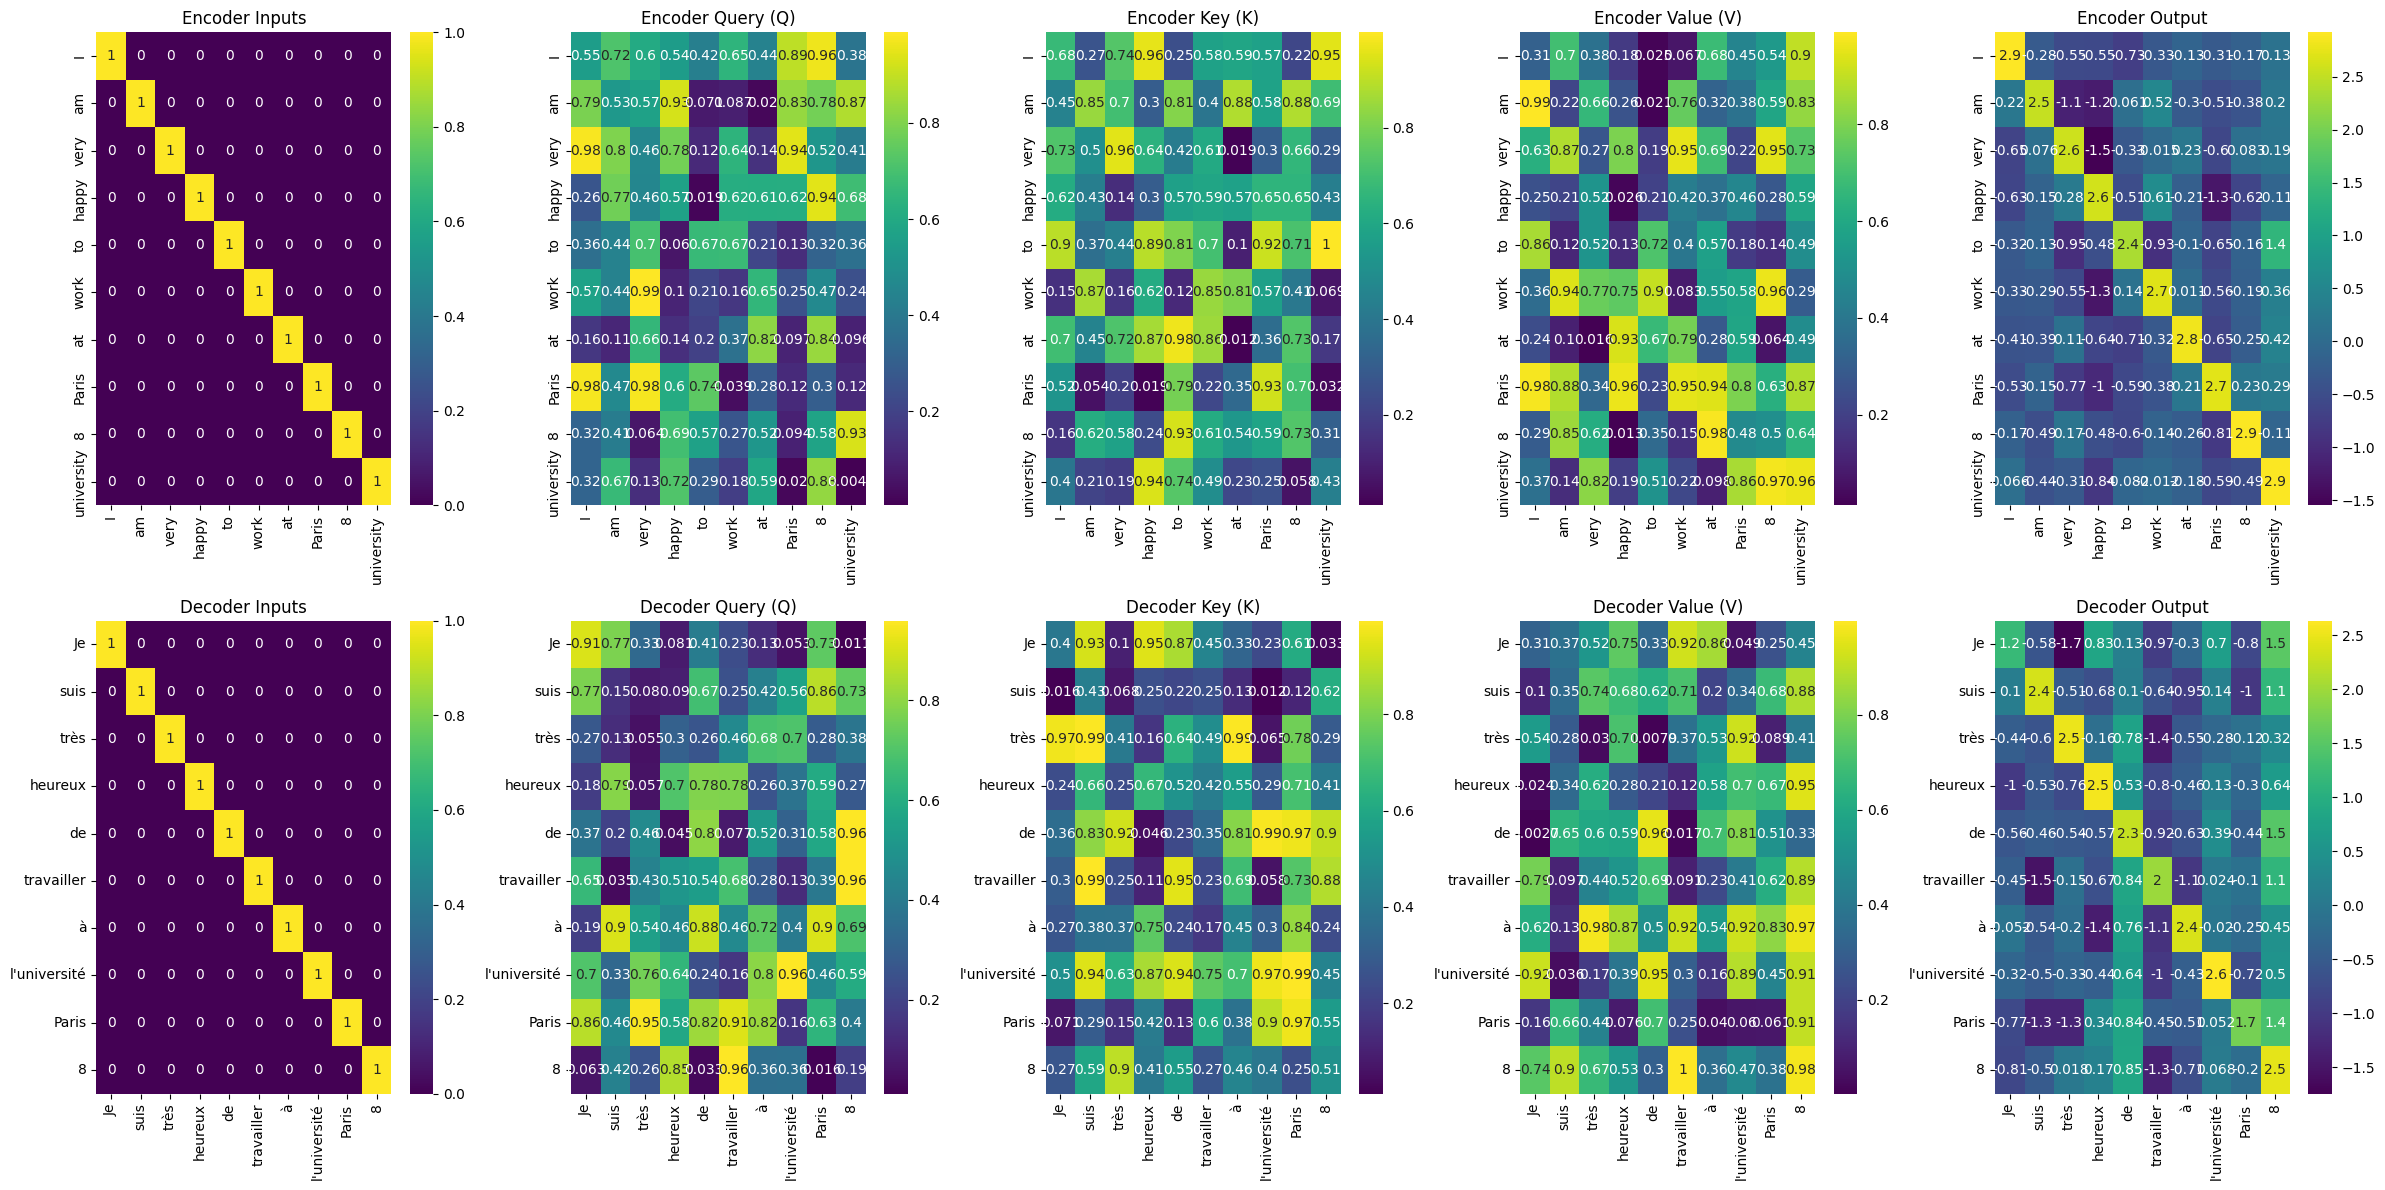

Encoder Sentence: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Encoder Inputs:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Encoder Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Tokenize the sentences
encoder_sentence = "I am very happy to work at Paris 8 university".split()
decoder_sentence = "Je suis très heureux de travailler à l'université Paris 8".split()

# Vocabulary sizes
encoder_vocab_size = len(encoder_sentence)
decoder_vocab_size = len(decoder_sentence)

# Create one-hot embeddings for each word
encoder_word_to_index = {word: idx for idx, word in enumerate(encoder_sentence)}
decoder_word_to_index = {word: idx for idx, word in enumerate(decoder_sentence)}
encoder_embeddings = np.eye(encoder_vocab_size)
decoder_embeddings = np.eye(decoder_vocab_size)

# Convert sentences to sequences of embeddings
encoder_inputs = np.array([encoder_embeddings[encoder_word_to_index[word]] for word in encoder_sentence])
decoder_inputs = np.array([decoder_embeddings[decoder_word_to_index[word]] for word in decoder_sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
np.random.seed(0)
Wq_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)

Wq_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wk_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wv_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)

W1_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 1 weights for encoder
W2_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 2 weights for encoder

W1_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 1 weights for decoder
W2_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 2 weights for decoder

# Encoder Self-Attention Layer
Q_encoder = np.dot(encoder_inputs, Wq_encoder)
K_encoder = np.dot(encoder_inputs, Wk_encoder)
V_encoder = np.dot(encoder_inputs, Wv_encoder)

scores_encoder = np.dot(Q_encoder, K_encoder.T) / np.sqrt(K_encoder.shape[1])
attention_weights_encoder = softmax(scores_encoder)
attention_output_encoder = np.dot(attention_weights_encoder, V_encoder)

# Add & Norm Layer (Encoder Self-Attention Output + Inputs)
attention_output_encoder = layer_norm(attention_output_encoder + encoder_inputs)

# Encoder Feed-Forward Layer
ffn_output_encoder = np.dot(attention_output_encoder, W1_encoder)
ffn_output_encoder = np.maximum(0, ffn_output_encoder)  # ReLU activation
ffn_output_encoder = np.dot(ffn_output_encoder, W2_encoder)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output_encoder + attention_output_encoder)

# Decoder Self-Attention Layer
Q_decoder = np.dot(decoder_inputs, Wq_decoder)
K_decoder = np.dot(decoder_inputs, Wk_decoder)
V_decoder = np.dot(decoder_inputs, Wv_decoder)

scores_decoder = np.dot(Q_decoder, K_decoder.T) / np.sqrt(K_decoder.shape[1])
attention_weights_decoder = softmax(scores_decoder)
attention_output_decoder = np.dot(attention_weights_decoder, V_decoder)

# Add & Norm Layer (Decoder Self-Attention Output + Inputs)
attention_output_decoder = layer_norm(attention_output_decoder + decoder_inputs)

# Decoder Cross-Attention Layer (using encoder outputs)
Q_cross = np.dot(attention_output_decoder, Wq_decoder)
K_cross = np.dot(encoder_output, Wk_encoder)
V_cross = np.dot(encoder_output, Wv_encoder)

scores_cross = np.dot(Q_cross, K_cross.T) / np.sqrt(K_cross.shape[1])
attention_weights_cross = softmax(scores_cross)
cross_attention_output = np.dot(attention_weights_cross, V_cross)

# Add & Norm Layer (Cross-Attention Output + Decoder Self-Attention Output)
cross_attention_output = layer_norm(cross_attention_output + attention_output_decoder)

# Decoder Feed-Forward Layer
ffn_output_decoder = np.dot(cross_attention_output, W1_decoder)
ffn_output_decoder = np.maximum(0, ffn_output_decoder)  # ReLU activation
ffn_output_decoder = np.dot(ffn_output_decoder, W2_decoder)

# Add & Norm Layer (Feed-Forward Output + Cross-Attention Output)
decoder_output = layer_norm(ffn_output_decoder + cross_attention_output)

# Visualization
plt.figure(figsize=(24, 12))

# Plotting the encoder inputs
plt.subplot(2, 5, 1)
sns.heatmap(encoder_inputs, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Inputs')

# Plotting encoder Query (Q) matrix
plt.subplot(2, 5, 2)
sns.heatmap(Q_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Query (Q)')

# Plotting encoder Key (K) matrix
plt.subplot(2, 5, 3)
sns.heatmap(K_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Key (K)')

# Plotting encoder Value (V) matrix
plt.subplot(2, 5, 4)
sns.heatmap(V_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Value (V)')

# Plotting encoder output
plt.subplot(2, 5, 5)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Output')

# Plotting the decoder inputs
plt.subplot(2, 5, 6)
sns.heatmap(decoder_inputs, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Inputs')

# Plotting decoder Query (Q) matrix
plt.subplot(2, 5, 7)
sns.heatmap(Q_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Query (Q)')

# Plotting decoder Key (K) matrix
plt.subplot(2, 5, 8)
sns.heatmap(K_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Key (K)')

# Plotting decoder Value (V) matrix
plt.subplot(2, 5, 9)
sns.heatmap(V_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Value (V)')

# Plotting decoder output
plt.subplot(2, 5, 10)
sns.heatmap(decoder_output, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Output')

plt.tight_layout()
plt.show()

print("Encoder Sentence:", encoder_sentence)
print("\nEncoder Inputs:\n", encoder_inputs)
print("\nEncoder Query (Q):\n", Q_encoder)
print("\nEncoder Key (K):\n", K_encoder)
print("\nEncoder Value (V):\n", V_encoder)
print("\nEncoder Output:\n", encoder_output)

print("\nDecoder Sentence:", decoder_sentence)
print("\nDecoder Inputs:\n", decoder_inputs)
print("\nDecoder Query (Q):\n", Q_decoder)
print("\nDecoder Key (K):\n", K_decoder)
print("\nDecoder Value (V):\n", V_decoder)
print("\nDecoder Output:\n", decoder_output)

### Complete Encoder-Decoder Implementation Using Multi-Head Self-Attention : A transformer !

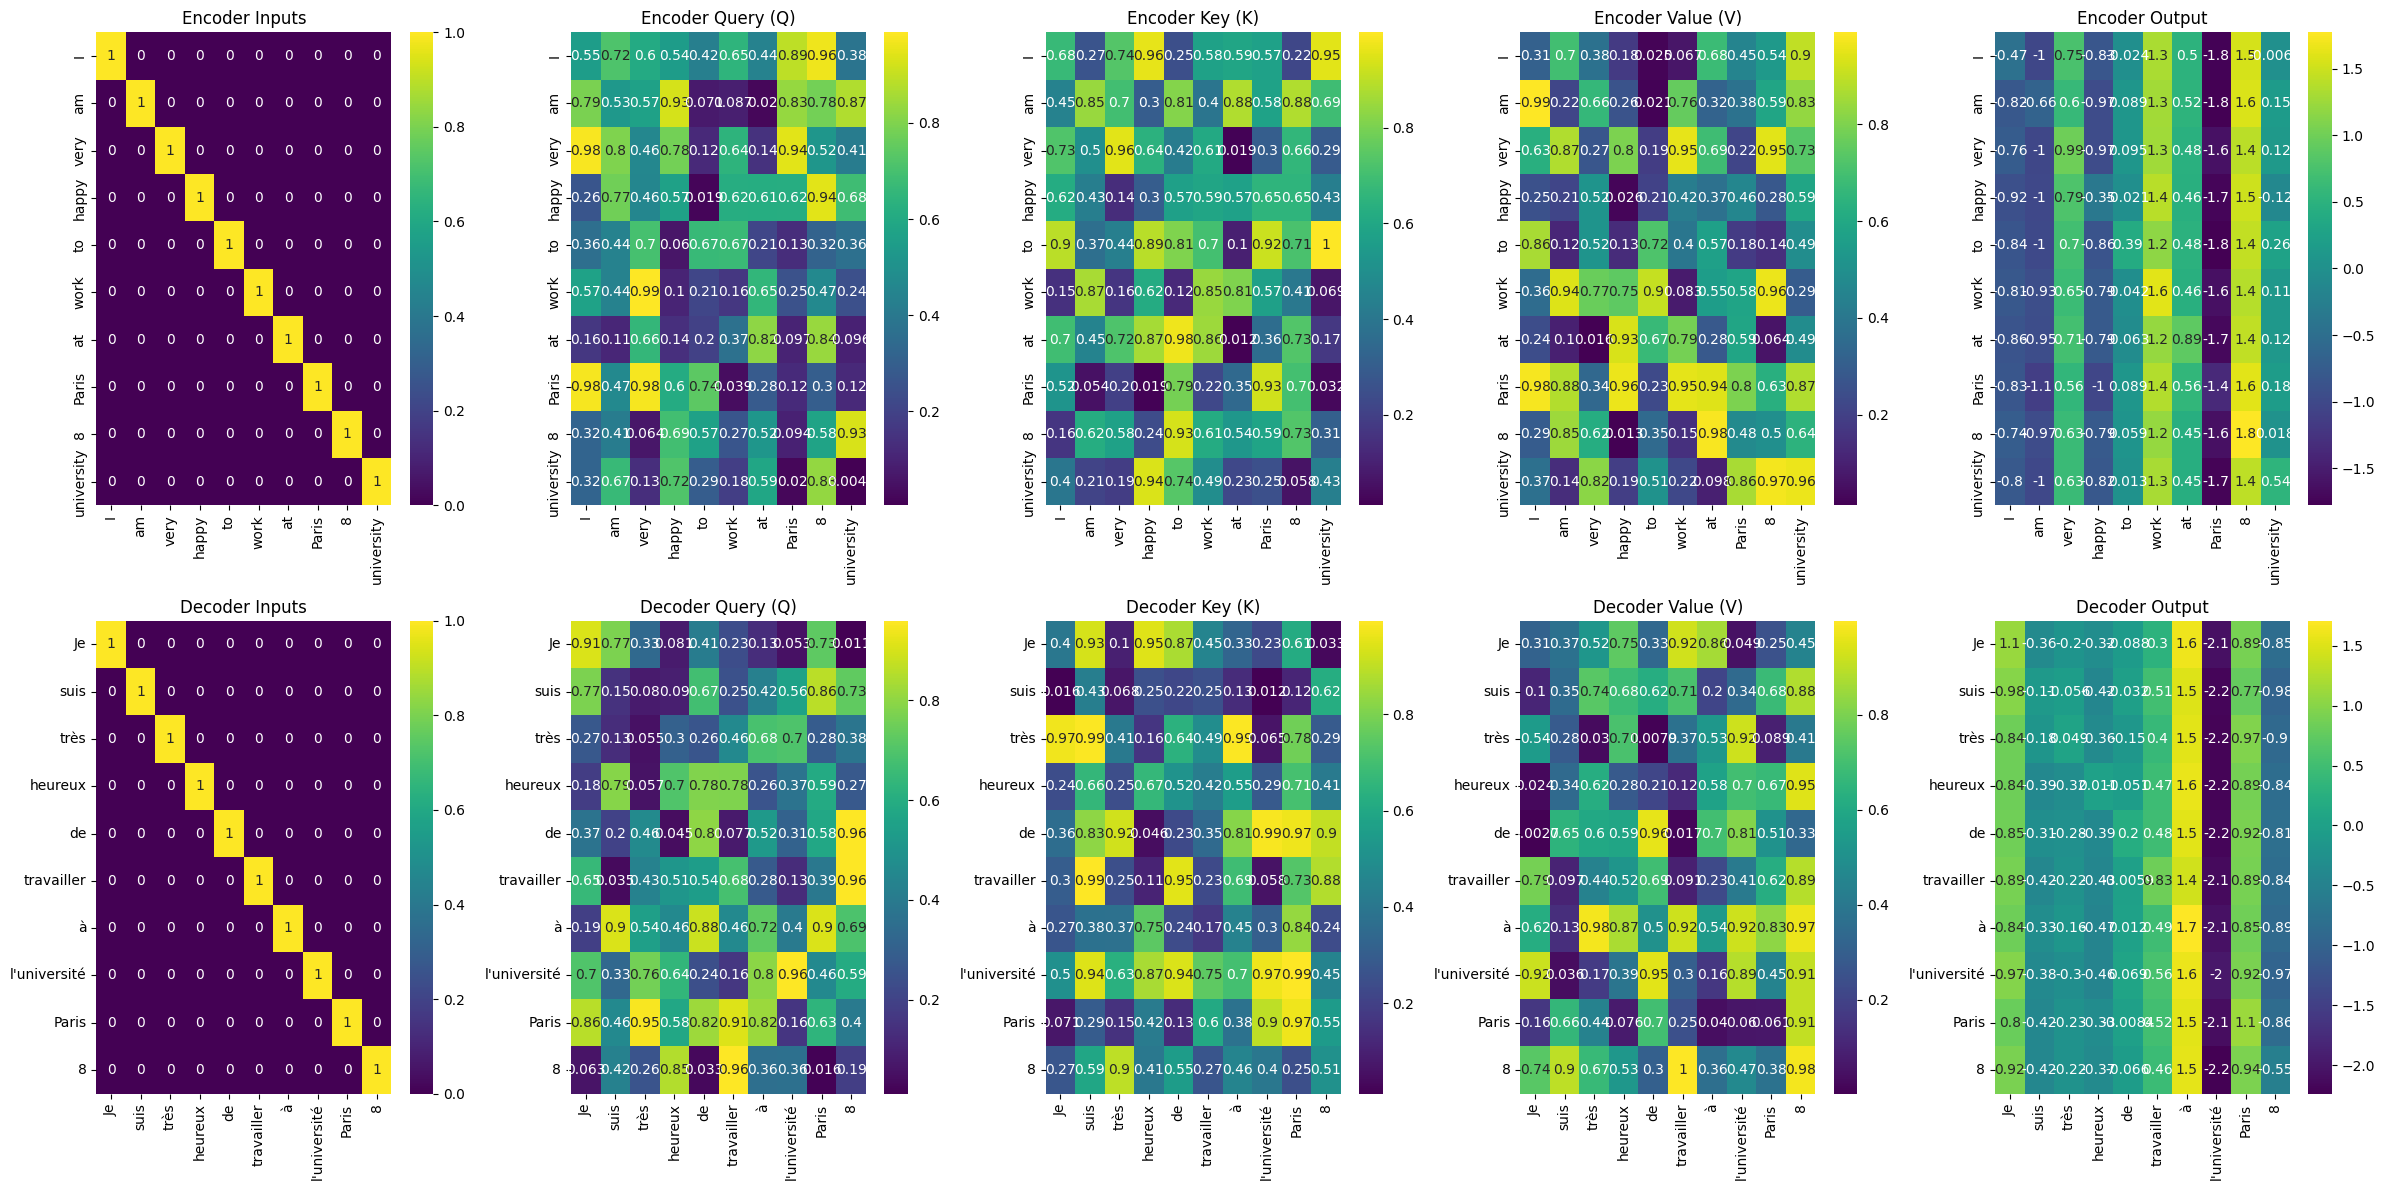

Encoder Sentence: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Encoder Inputs:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Encoder Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Multi-head attention function
def multi_head_attention(Q, K, V, num_heads):
    d_model = Q.shape[-1] # Get the embedding dimension
    d_k = d_model // num_heads # Calculate the dimension of each head

    # Linear transformations for each head
    Q_heads = [np.dot(Q, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    K_heads = [np.dot(K, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    V_heads = [np.dot(V, np.random.rand(d_model, d_k)) for _ in range(num_heads)]

    attention_outputs = []
    for i in range(num_heads):
        scores = np.dot(Q_heads[i], K_heads[i].T) / np.sqrt(d_k)
        attention_weights = softmax(scores)
        attention_output = np.dot(attention_weights, V_heads[i])
        attention_outputs.append(attention_output)

    # Concatenate all the heads
    concatenated_output = np.concatenate(attention_outputs, axis=-1)

    # Linear transformation to map the concatenated output back to the original dimension
    output = np.dot(concatenated_output, np.random.rand(concatenated_output.shape[-1], d_model))
    return output

# Tokenize the sentences
encoder_sentence = "I am very happy to work at Paris 8 university".split()
decoder_sentence = "Je suis très heureux de travailler à l'université Paris 8".split()

# Vocabulary sizes
encoder_vocab_size = len(encoder_sentence)
decoder_vocab_size = len(decoder_sentence)

# Create one-hot embeddings for each word
encoder_word_to_index = {word: idx for idx, word in enumerate(encoder_sentence)}
decoder_word_to_index = {word: idx for idx, word in enumerate(decoder_sentence)}
encoder_embeddings = np.eye(encoder_vocab_size)
decoder_embeddings = np.eye(decoder_vocab_size)

# Convert sentences to sequences of embeddings
encoder_inputs = np.array([encoder_embeddings[encoder_word_to_index[word]] for word in encoder_sentence])
decoder_inputs = np.array([decoder_embeddings[decoder_word_to_index[word]] for word in decoder_sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
num_heads = 4
np.random.seed(0)
Wq_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)

Wq_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wk_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wv_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)

W1_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 1 weights for encoder
W2_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 2 weights for encoder

W1_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 1 weights for decoder
W2_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 2 weights for decoder

# Encoder Multi-Head Self-Attention Layer
Q_encoder = np.dot(encoder_inputs, Wq_encoder)
K_encoder = np.dot(encoder_inputs, Wk_encoder)
V_encoder = np.dot(encoder_inputs, Wv_encoder)

attention_output_encoder = multi_head_attention(Q_encoder, K_encoder, V_encoder, num_heads)

# Add & Norm Layer (Encoder Self-Attention Output + Inputs)
attention_output_encoder = layer_norm(attention_output_encoder + encoder_inputs)

# Encoder Feed-Forward Layer
ffn_output_encoder = np.dot(attention_output_encoder, W1_encoder)
ffn_output_encoder = np.maximum(0, ffn_output_encoder)  # ReLU activation
ffn_output_encoder = np.dot(ffn_output_encoder, W2_encoder)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output_encoder + attention_output_encoder)

# Decoder Multi-Head Self-Attention Layer
Q_decoder = np.dot(decoder_inputs, Wq_decoder)
K_decoder = np.dot(decoder_inputs, Wk_decoder)
V_decoder = np.dot(decoder_inputs, Wv_decoder)

attention_output_decoder = multi_head_attention(Q_decoder, K_decoder, V_decoder, num_heads)

# Add & Norm Layer (Decoder Self-Attention Output + Inputs)
attention_output_decoder = layer_norm(attention_output_decoder + decoder_inputs)

# Decoder Cross-Attention Layer (using encoder outputs)
Q_cross = np.dot(attention_output_decoder, Wq_decoder)
K_cross = np.dot(encoder_output, Wk_encoder)
V_cross = np.dot(encoder_output, Wv_encoder)

cross_attention_output = multi_head_attention(Q_cross, K_cross, V_cross, num_heads)

# Add & Norm Layer (Cross-Attention Output + Decoder Self-Attention Output)
cross_attention_output = layer_norm(cross_attention_output + attention_output_decoder)

# Decoder Feed-Forward Layer
ffn_output_decoder = np.dot(cross_attention_output, W1_decoder)
ffn_output_decoder = np.maximum(0, ffn_output_decoder)  # ReLU activation
ffn_output_decoder = np.dot(ffn_output_decoder, W2_decoder)

# Add & Norm Layer (Feed-Forward Output + Cross-Attention Output)
decoder_output = layer_norm(ffn_output_decoder + cross_attention_output)

# Visualization
plt.figure(figsize=(24, 12))

# Plotting the encoder inputs
plt.subplot(2, 5, 1)
sns.heatmap(encoder_inputs, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Inputs')

# Plotting encoder Query (Q) matrix
plt.subplot(2, 5, 2)
sns.heatmap(Q_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Query (Q)')

# Plotting encoder Key (K) matrix
plt.subplot(2, 5, 3)
sns.heatmap(K_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Key (K)')

# Plotting encoder Value (V) matrix
plt.subplot(2, 5, 4)
sns.heatmap(V_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Value (V)')

# Plotting encoder output
plt.subplot(2, 5, 5)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Output')

# Plotting the decoder inputs
plt.subplot(2, 5, 6)
sns.heatmap(decoder_inputs, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Inputs')

# Plotting decoder Query (Q) matrix
plt.subplot(2, 5, 7)
sns.heatmap(Q_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Query (Q)')

# Plotting decoder Key (K) matrix
plt.subplot(2, 5, 8)
sns.heatmap(K_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Key (K)')

# Plotting decoder Value (V) matrix
plt.subplot(2, 5, 9)
sns.heatmap(V_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Value (V)')

# Plotting decoder output
plt.subplot(2, 5, 10)
sns.heatmap(decoder_output, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Output')

plt.tight_layout()
plt.show()

print("Encoder Sentence:", encoder_sentence)
print("\nEncoder Inputs:\n", encoder_inputs)
print("\nEncoder Query (Q):\n", Q_encoder)
print("\nEncoder Key (K):\n", K_encoder)
print("\nEncoder Value (V):\n", V_encoder)
print("\nEncoder Output:\n", encoder_output)

print("\nDecoder Sentence:", decoder_sentence)
print("\nDecoder Inputs:\n", decoder_inputs)
print("\nDecoder Query (Q):\n", Q_decoder)
print("\nDecoder Key (K):\n", K_decoder)
print("\nDecoder Value (V):\n", V_decoder)
print("\nDecoder Output:\n", decoder_output)

## **Exercice 1 :** Self-Attention mechanism: basic implementation

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# --- Utility Function for Visualization ---
def plot_matrix(matrix, title):
    """
    Visualizes a 2D matrix (like Q, K, V, or Attention Weights) using a heatmap.
    The reshape is necessary to combine the batch and sequence dimensions for a single plot.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Embedding Dimension / Key/Value Index')
    plt.ylabel('Token Index (Batch and Sequence combined)')
    plt.show()

In [85]:

# 1. Modified Input Sequence
# The input is structured as a 3D Tensor: (Batch Size, Sequence Length, Embedding Dimension)
# The new shape is (3, 2, 4):
# - Batch Size: 3 (3 independent examples/data points)
# - Sequence Length: 2 (each example has 2 tokens/vectors)
# - Embedding Dimension (d_model): 4 (each token is a 4-dimensional vector)
input_sequence = np.array([
    [[1, 0, 1, 0],
     [0, 1, 0, 1]], # Example 1: 2 tokens, 4 features each

    [[0, 2, 1, 0],
     [1, 0, 0, 1]], # Example 2: 2 tokens, 4 features each

    [[1, 1, 0, 1],
     [0, 0, 1, 1]]  # Example 3: 2 tokens, 4 features each
    ], dtype=float)

print("New input sequence shape: ", input_sequence.shape)


New input sequence shape:  (3, 2, 4)


In [86]:
# 2. Single-Head Attention Mechanism

# Define model parameters based on the input
d_model = input_sequence.shape[-1]  # The size of the embedding vector (4 in this case)
num_heads = 1                      # Simple self-attention (one head)


In [87]:
# --- Q, K, V Generation (Linear Projection) ---
# Generate Q, K, V matrices using independent linear transformations (Dense layers).
# These layers learn to project the input token into three different representational spaces.
query = tf.keras.layers.Dense(d_model, use_bias=False)(input_sequence)
key = tf.keras.layers.Dense(d_model, use_bias=False)(input_sequence)
value = tf.keras.layers.Dense(d_model, use_bias=False)(input_sequence)

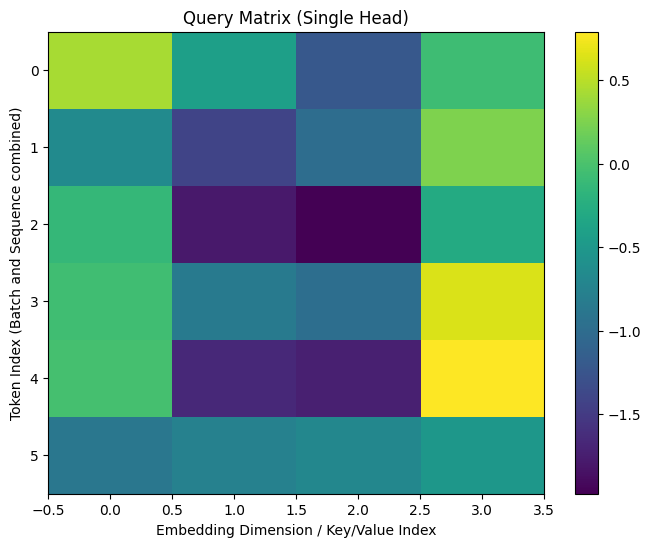

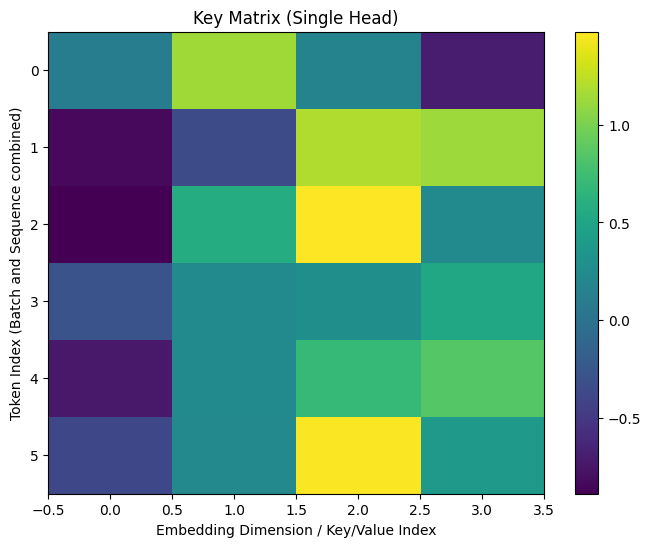

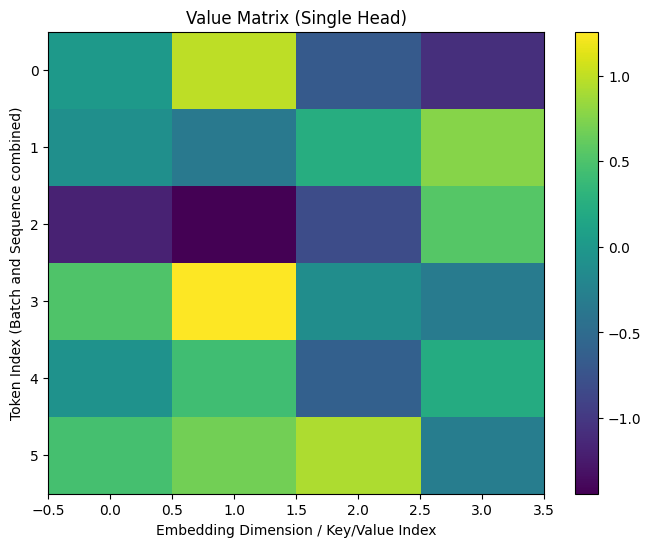

In [88]:
# Visualization preparation: Reshape from (Batch, Seq_Len, d_model) to (Batch * Seq_Len, d_model), to flatten the batch and sequence dimensions for a  2D matrix.

plot_matrix(query.numpy().reshape(-1, d_model), "Query Matrix (Single Head)")
plot_matrix(key.numpy().reshape(-1, d_model), "Key Matrix (Single Head)")
plot_matrix(value.numpy().reshape(-1, d_model), "Value Matrix (Single Head)")

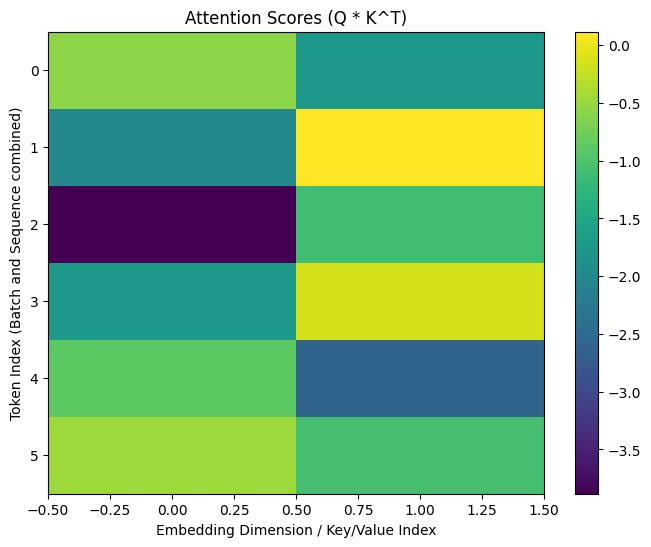

In [89]:
# Calculate Attention Scores : Score = Q * K^T.
# This measures the compatibility  of every Query token with every Key token.
# Shape is (Batch Size, Seq_Len, Seq_Len)
scores = tf.matmul(query, key, transpose_b=True)
# Reshape for visualization: (Batch * Seq_Len, Seq_Len)
plot_matrix(scores.numpy().reshape(scores.shape[0] * scores.shape[1], -1), "Attention Scores (Q * K^T)")


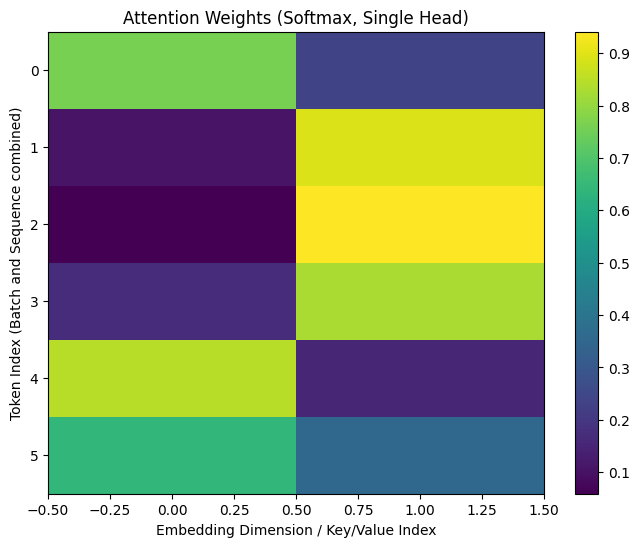

In [90]:
# 2. Apply Softmax to get Weights ---
# Softmax: Normalizes the scores, turning them into a probability distribution
attention_weights = tf.nn.softmax(scores, axis=-1)
plot_matrix(attention_weights.numpy().reshape(attention_weights.shape[0] * attention_weights.shape[1], -1),
            "Attention Weights (Softmax, Single Head)")

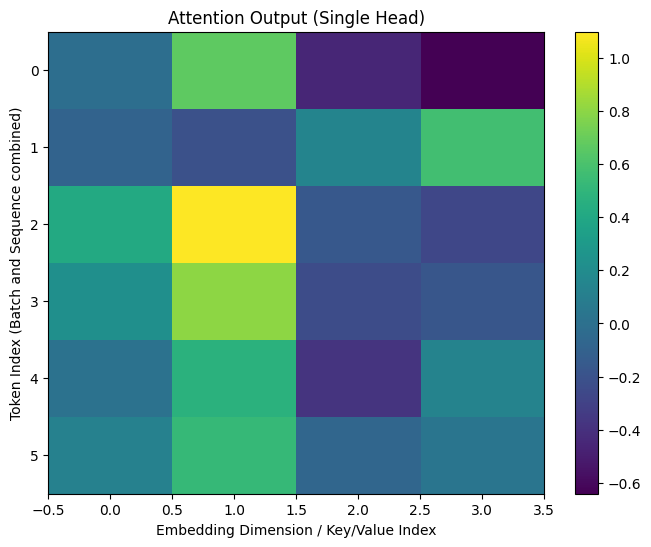

In [91]:
# 3. Calculate Attention Output
attention_output = tf.matmul(attention_weights, value)
plot_matrix(attention_output.numpy().reshape(-1, d_model), "Attention Output (Single Head)")


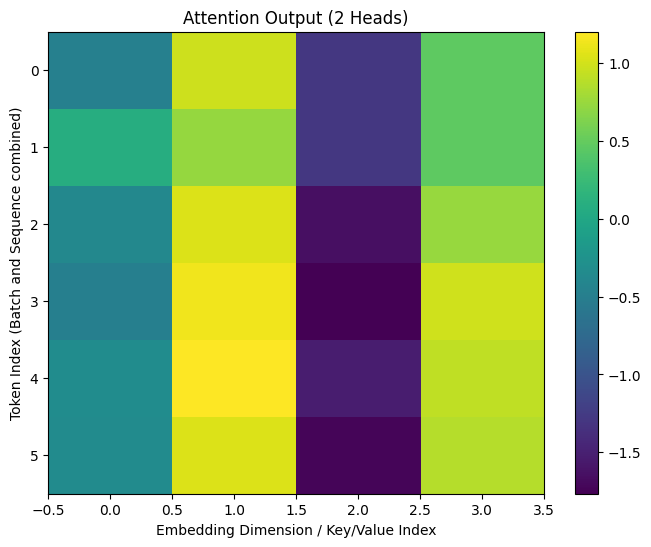

In [92]:
# 3. Multi-Head Attention (2 Heads)
num_heads = 2
depth = d_model // num_heads  # Dimension per head (4 / 2 = 2)

# Split Heads Function
def split_heads(x, num_heads):
    """Splits the last dimension (d_model) into (num_heads, depth) and transposes."""
    batch_size = tf.shape(x)[0]
    seq_len = tf.shape(x)[1]
    depth = x.shape[-1] // num_heads
    # 1. Reshape: (Batch, Seq_Len, num_heads, depth)
    x = tf.reshape(x, (batch_size, seq_len, num_heads, depth))
    # 2. Transpose: (Batch, num_heads, Seq_Len, depth)
    # This prepares the tensor for parallel matrix multiplication across all heads.
    return tf.transpose(x, perm=[0, 2, 1, 3])

# Q, K, V Generation (Linear Projection)
# Re-generate Q, K, V matrices (Linear Layer before splitting)
query = tf.keras.layers.Dense(d_model, use_bias=False)(input_sequence)
key = tf.keras.layers.Dense(d_model, use_bias=False)(input_sequence)
value = tf.keras.layers.Dense(d_model, use_bias=False)(input_sequence)

# Split projections into multiple heads
query_heads = split_heads(query, num_heads) # Shape: (3, 2, 2, 2)
key_heads = split_heads(key, num_heads)     # Shape: (3, 2, 2, 2)
value_heads = split_heads(value, num_heads) # Shape: (3, 2, 2, 2)

# Calculate Multi-Head Attention
# Calculate scores independently for each head
scores_multi = tf.matmul(query_heads, key_heads, transpose_b=True)

# Apply Softmax to get attention weights for each head
attention_weights_multi = tf.nn.softmax(scores_multi, axis=-1)

# Calculate the weighted sum for each head
attention_output_multi = tf.matmul(attention_weights_multi, value_heads)

# --- Recombine Heads ---
# 1. Transpose: (Batch, Seq_Len, num_heads, depth)
attention_output_multi = tf.transpose(attention_output_multi, perm=[0, 2, 1, 3])
# 2. Concatenate the heads back together: (Batch, Seq_Len, d_model)
attention_output_multi = tf.reshape(attention_output_multi, (tf.shape(input_sequence)[0], -1, d_model))
# The output is then passed through a final linear layer
plot_matrix(attention_output_multi.numpy().reshape(-1, d_model), "Attention Output (2 Heads)")



=== Scaling factor = 1.0 ===


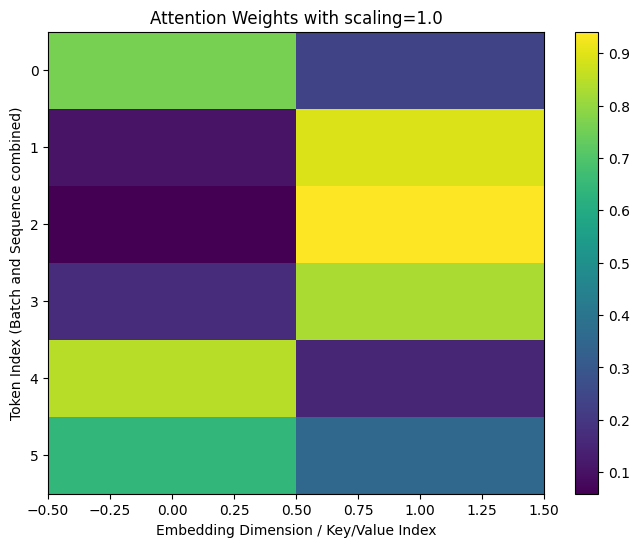

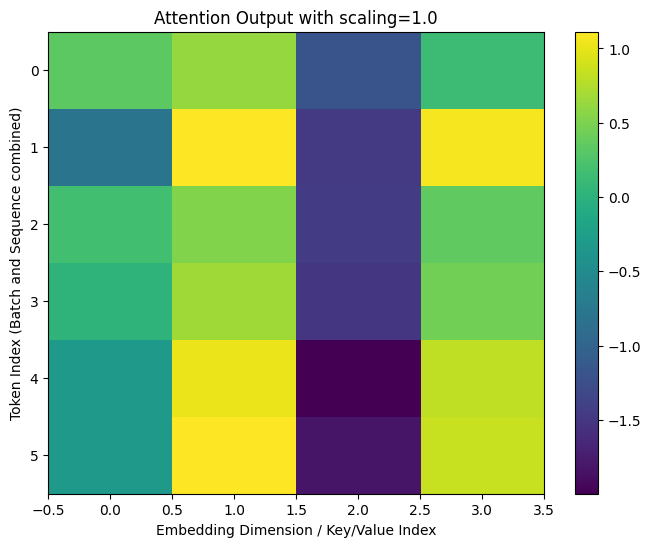

Effect of Scale=1.0: Baseline (no scaling).

=== Scaling factor = 0.5 ===


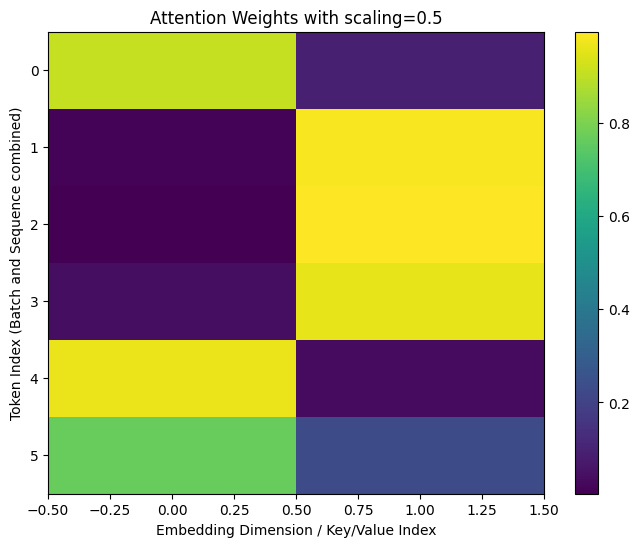

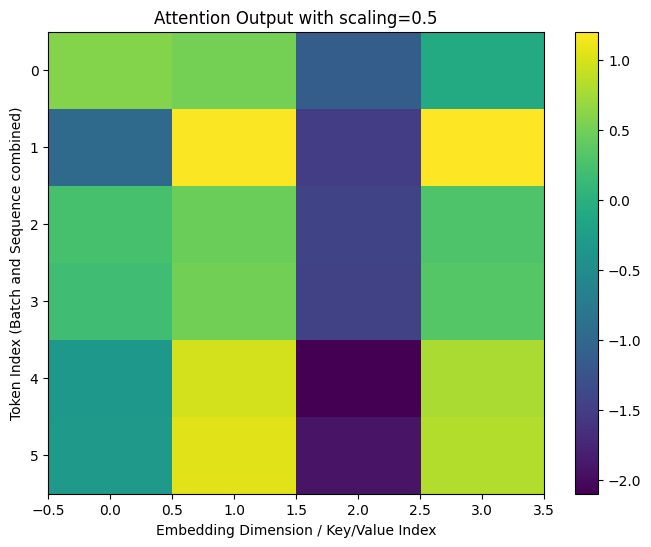

Effect of Scale=0.5 (Stronger Softmax): Weights are sharper/more concentrated (closer to 0 or 1).

=== Scaling factor = 2.0 ===


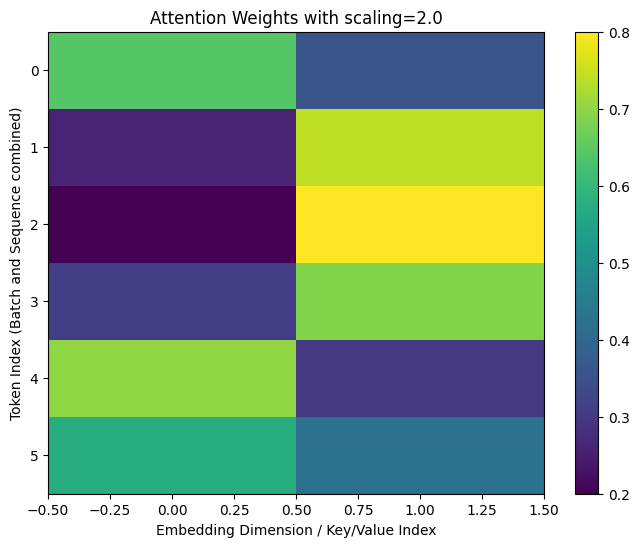

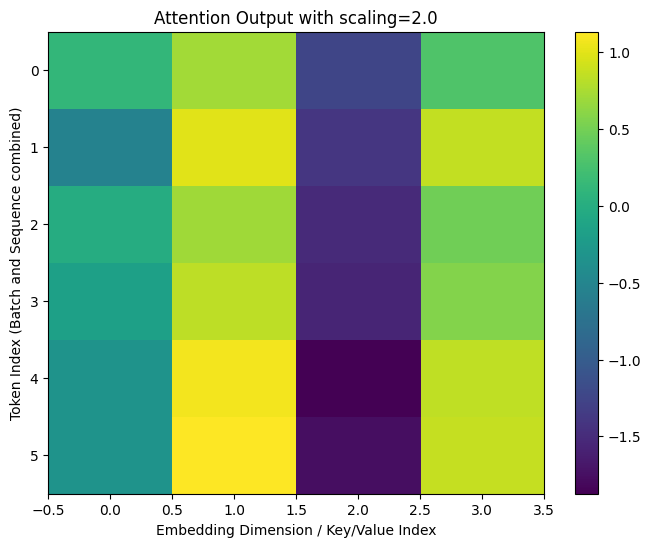

Effect of Scale=2.0 (Weaker Softmax): Weights are smoother/more uniform (closer to an even distribution).


In [93]:

# 4. Experimenting with different Scaling Factors
# In a standard Transformer, scores are scaled by: 1/sqrt(depth_k)
# Here, I experiment with constants to see the effect on the resulting distribution
scaling_factors = [1.0, 0.5, 2.0]  # 1.0 (no scaling), 0.5 (stronger softmax), 2.0 (weaker softmax)

# reuse the single-head scores and value from section 2 for this experiment
for scale in scaling_factors:
    print(f"\n=== Scaling factor = {scale} ===")

    # 1. Scale the scores
    scaled_scores = scores / scale

    # 2. Apply Softmax to get weights
    attention_weights_scaled = tf.nn.softmax(scaled_scores, axis=-1)

    # 3. Calculate output
    attention_output_scaled = tf.matmul(attention_weights_scaled, value)

    plot_matrix(attention_weights_scaled.numpy().reshape(-1, attention_weights_scaled.shape[-1]),
                f"Attention Weights with scaling={scale}")
    plot_matrix(attention_output_scaled.numpy().reshape(-1, d_model),
                f"Attention Output with scaling={scale}")

    if scale == 0.5:
        print("Effect of Scale=0.5 (Stronger Softmax): Weights are sharper/more concentrated (closer to 0 or 1).")
    elif scale == 2.0:
        print("Effect of Scale=2.0 (Weaker Softmax): Weights are smoother/more uniform (closer to an even distribution).")
    else:
        print("Effect of Scale=1.0: Baseline (no scaling).")


## **Exercice 2 :** Self-Attention mechanism: Using a sentence as input

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Softmax function: converts scores to attention probabilities (weights).
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

In [96]:
# 1. Input and Embeddings ---

# The new longer sentence for self-attention, including 'PAD'.
sentence = ["I", "love", "plunging", "into", "the", "sea", "PAD"]

In [97]:
# Simple illustrative 3D embeddings
embeddings = {
    "I": [1, 0, 1],
    "love": [0, 1, 0],
    "plunging": [1, 1, 0],
    "into": [1, 1, 1],
    "the": [0, 0, 1],
    "sea": [1, 0, 0], # Focus on the key element 'sea'
    "PAD": [0, 0, 0] # Padding token vector.
}

In [98]:
# Convert the sentence into a sequence of input vectors.
inputs = np.array([embeddings[word] for word in sentence])

In [99]:
# 2. Weight Initialization
np.random.seed(0)
# Randomly initialize the transformation matrices (3x3).
Wq = np.random.rand(3, 3) # Query weights
Wk = np.random.rand(3, 3) # Key weights
Wv = np.random.rand(3, 3) # Value weights

In [100]:
# 3. Compute Query, Key, Value
# Project inputs into Q, K, and V spaces using the learned weights
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

In [101]:
# 4. Scores and Masking

# Calculate raw attention scores: Q * K.T (similarity measure). Scale by sqrt(d_k)
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

# Create mask: identifies the 'PAD' position (1 for PAD, 0 otherwise)
mask = np.array([1 if word == "PAD" else 0 for word in sentence])
mask_matrix = np.tile(mask, (len(sentence), 1))

# Apply mask: set PAD-related scores to a huge negative number (-1e9) to zero them out after Softmax
masked_scores = scores.copy()
masked_scores[mask_matrix == 1] = -1e9

# Compute final attention weights (probabilities) with and without the mask
attention_weights = softmax(scores)
attention_weights_masked = softmax(masked_scores) # The correct, masked weights

In [102]:
# 5. Outputs
# Compute the context vectors: weighted sum of Value (V) vectors
output = np.dot(attention_weights, V)
output_masked = np.dot(attention_weights_masked, V) # Final context-aware output

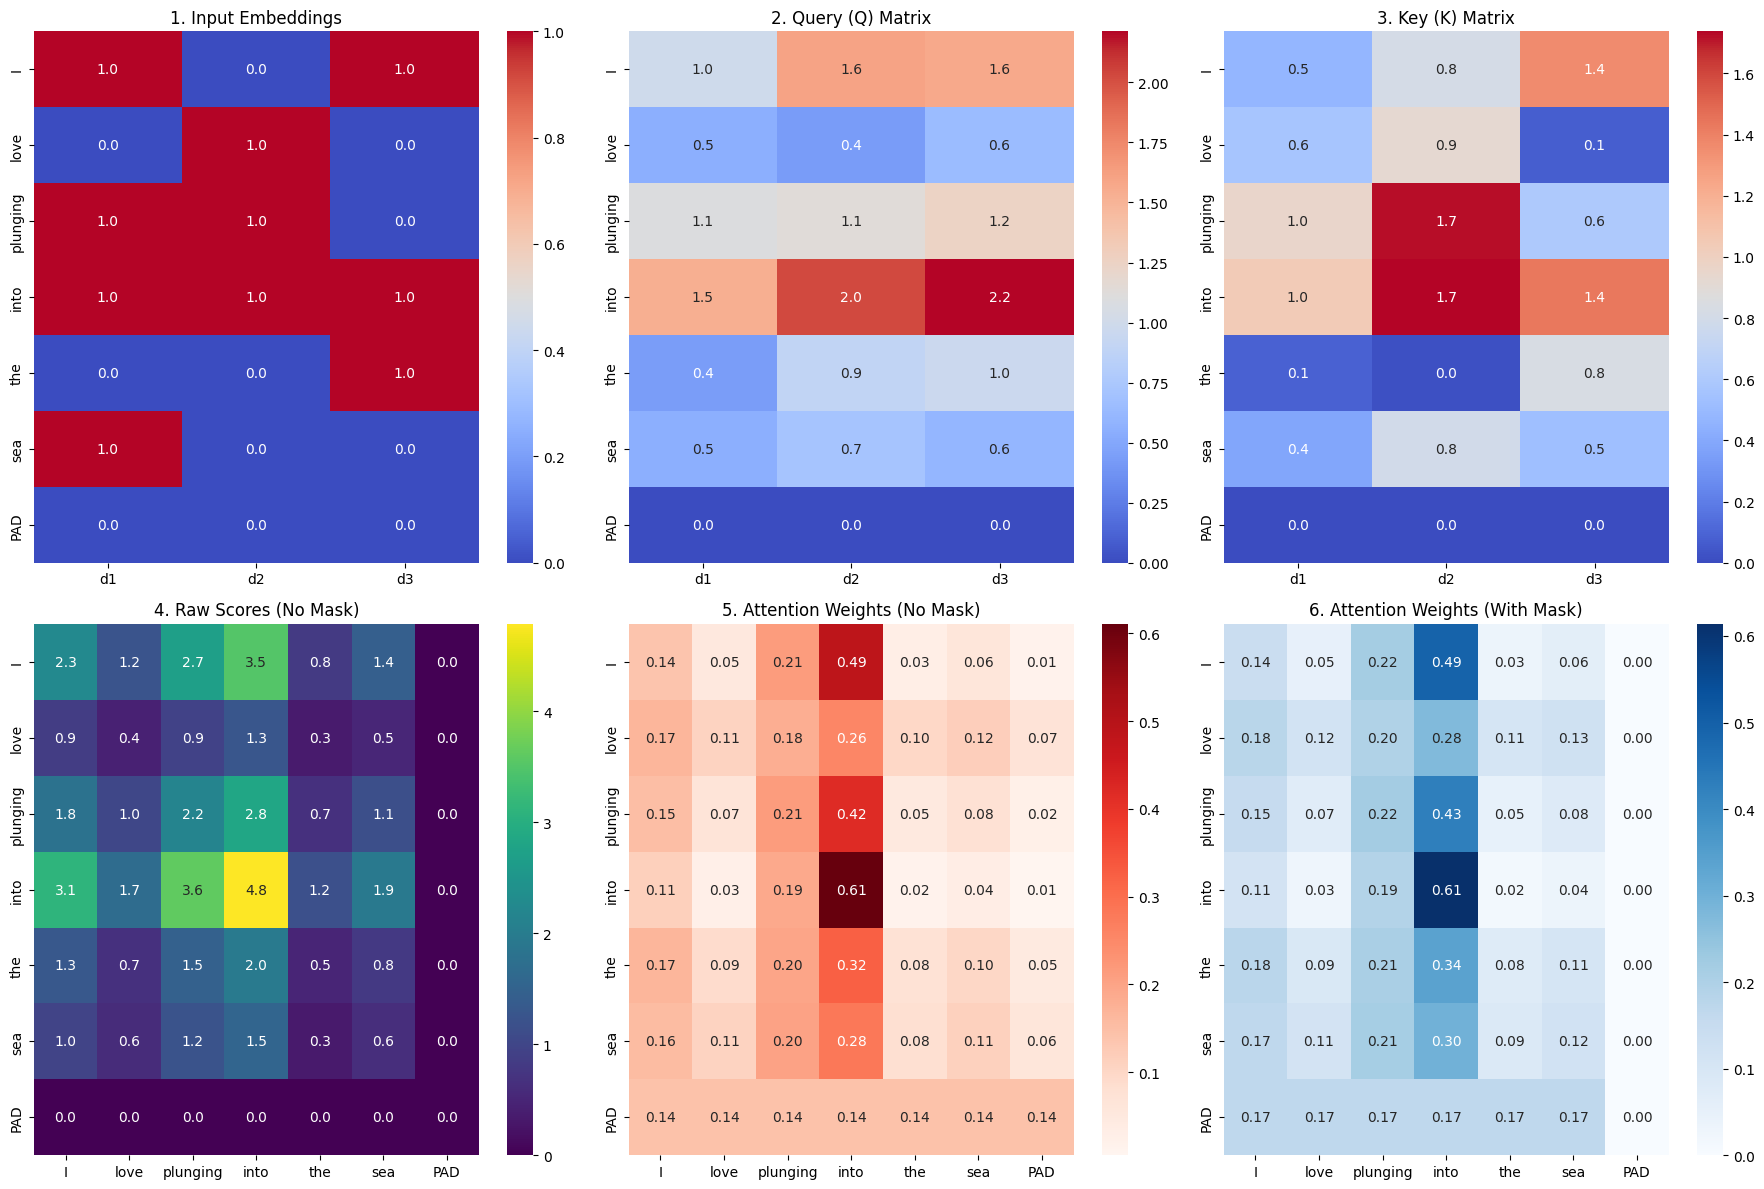

In [103]:
# 6. Visualizations
plt.figure(figsize=(18, 12))

# Visualize input embeddings (vectors)
plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, cmap='coolwarm', fmt=".1f", xticklabels=["d1","d2","d3"], yticklabels=sentence)
plt.title("1. Input Embeddings")

# Visualize the Query matrix
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap='coolwarm', fmt=".1f", xticklabels=['d1', 'd2', 'd3'], yticklabels=sentence)
plt.title("2. Query (Q) Matrix")

# Visualize the Key matrix
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap='coolwarm', fmt=".1f", xticklabels=['d1', 'd2', 'd3'], yticklabels=sentence)
plt.title("3. Key (K) Matrix")

# Visualize raw attention scores
plt.subplot(2, 3, 4)
sns.heatmap(scores, annot=True, cmap='viridis', fmt=".1f", xticklabels=sentence, yticklabels=sentence)
plt.title("4. Raw Scores (No Mask)")

# Visualize attention weights without mask. Shows incorrect attention to 'PAD'
plt.subplot(2, 3, 5)
sns.heatmap(attention_weights, annot=True, cmap='Reds', fmt=".2f", xticklabels=sentence, yticklabels=sentence)
plt.title("5. Attention Weights (No Mask)")

# Visualize attention weights with mask. The 'PAD' column is correctly zeroed
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights_masked, annot=True, cmap='Blues', fmt=".2f", xticklabels=sentence, yticklabels=sentence)
plt.title("6. Attention Weights (With Mask)")
#

plt.tight_layout()
plt.show()

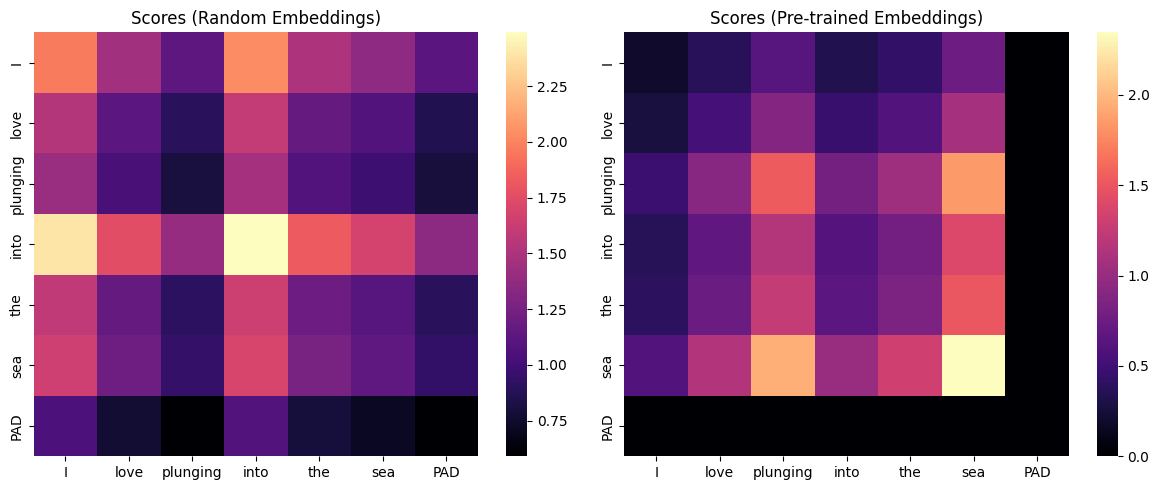

In [104]:
# 7. Embedding Initialization Experiment

# a) Random Initialization: Baseline without prior semantic knowledge
random_embeddings = {word: np.random.rand(3) for word in sentence}
inputs_random = np.array([random_embeddings[word] for word in sentence])
Q_r = np.dot(inputs_random, Wq)
K_r = np.dot(inputs_random, Wk)
scores_r = np.dot(Q_r, K_r.T) / np.sqrt(K_r.shape[1])

# b) Simulated Pre-trained Embeddings: Initial vectors have semantic meaning
pretrained_embeddings = {
    "I": [0.2, 0.1, 0.3], "love": [0.4, 0.5, 0.1], "plunging": [0.7, 0.8, 0.2],
    "into": [0.1, 0.3, 0.7], "the": [0.2, 0.6, 0.5], "sea": [0.8, 0.9, 0.4],
    "PAD": [0, 0, 0]
}
inputs_pretrained = np.array([pretrained_embeddings[word] for word in sentence])
Q_p = np.dot(inputs_pretrained, Wq)
K_p = np.dot(inputs_pretrained, Wk)
scores_p = np.dot(Q_p, K_p.T) / np.sqrt(K_p.shape[1])

# Visual comparison of raw scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(scores_r, annot=False, cmap='magma', xticklabels=sentence, yticklabels=sentence)
plt.title("Scores (Random Embeddings)")

plt.subplot(1, 2, 2)
sns.heatmap(scores_p, annot=False, cmap='magma', xticklabels=sentence, yticklabels=sentence)
plt.title("Scores (Pre-trained Embeddings)")

plt.tight_layout()
plt.show()

In [105]:
# --- Final Results ---
print("\n" + "="*50)
print("Self-Attention Summary for:", sentence)
print("="*50)
print("\nAttention Weights (With Mask - Correct):\n", attention_weights_masked)
print("\nOutput (Context Vector) With Mask:\n", output_masked)


Self-Attention Summary for: ['I', 'love', 'plunging', 'into', 'the', 'sea', 'PAD']

Attention Weights (With Mask - Correct):
 [[0.14179642 0.0518456  0.21691519 0.49318608 0.03389122 0.0623655
  0.        ]
 [0.17866484 0.11706698 0.19524496 0.27509049 0.1071257  0.12680703
  0.        ]
 [0.15453571 0.06985212 0.21928206 0.4279115  0.04922722 0.0791914
  0.        ]
 [0.11465188 0.02746775 0.19166668 0.6139927  0.01643076 0.03579024
  0.        ]
 [0.17540189 0.09296629 0.20664527 0.33922762 0.07891041 0.10684852
  0.        ]
 [0.16556219 0.11421327 0.21497832 0.29774864 0.08795956 0.11953802
  0.        ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.        ]]

Output (Context Vector) With Mask:
 [[1.39946708 1.57506918 1.58532172]
 [1.13946527 1.30495545 1.29810814]
 [1.33323848 1.5015352  1.51231279]
 [1.49792086 1.69308025 1.69274748]
 [1.22514412 1.3951071  1.39413516]
 [1.18706044 1.33620882 1.34913986]
 [0.97748766 1.13070829 1.11435346]]


## **Exercice 3 :** Self-Attention mechanism: Compute word embeddings

In [106]:
!pip install gensim

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec


In [108]:
#  1. Preparation: Sentence and Embeddings (Word2Vec)

# New sentence focusing on sea, vacation, and sun theme.
sentence = "Exploring the coast is the best vacation activity under the summer sun".lower().split()

# Train a simple Word2Vec model on the sentence.
# We keep vector_size=8 (d_model) for compact visualization.
model = Word2Vec([sentence], vector_size=8, min_count=1, epochs=100)

# Extract the generated Word2Vec vectors for each word.
embeddings = np.array([model.wv[word] for word in sentence])

print("Word2Vec Embeddings generated for each word (d_model=8).\n")

Word2Vec Embeddings generated for each word (d_model=8).



In [109]:
# 2. Xavier Initialization for Weight Matrices

def xavier_init(fan_in, fan_out):
    """Xavier (Glorot) uniform initialization.
    Scales initial weights to maintain variance across layers, aiding stable training."""
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

# Initialize the weight matrices for Query, Key, and Value using Xavier initialization
d_model = embeddings.shape[1]  # Dimension of the word vectors (8)
Wq = xavier_init(d_model, d_model) # Query weights
Wk = xavier_init(d_model, d_model) # Key weights
Wv = xavier_init(d_model, d_model) # Value weights
# Using Xavier ensures outputs (Q, K, V) variance stability


In [110]:
# 3. Positional Encoding Implementation

def positional_encoding(position, d_model):
    """Sinusoidal Positional Encoding (Transformer style).
    Generates vectors to explicitly inject sequence order information."""
    PE = np.zeros((position, d_model))
    # Calculate the division term (10000^(2i/d_model))
    denominator = 10000 ** (np.arange(0, d_model, 2) / d_model)

    for pos in range(position):
        # Apply sine to even indices
        PE[pos, 0::2] = np.sin(pos / denominator)
        # Apply cosine to odd indices
        if d_model > 1:
            PE[pos, 1::2] = np.cos(pos / denominator)
    return PE

# Generate and add the positional encoding to the word embeddings
pos_enc = positional_encoding(len(sentence), d_model)

# The inputs now combine semantic meaning (Word2Vec) and sequence order (PE)
inputs = embeddings + pos_enc
#

print("Positional Encoding added to the embeddings.\n")

Positional Encoding added to the embeddings.



In [111]:
# 4. Compute Q, K, V
# Compute the linear projections Q, K, and V from the combined inputs
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)


In [112]:
# 5. Compute Attention Scores and Weights

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Scaled Dot-Product Attention: Q * K.T / sqrt(d_k)
# These scores measure the content and position-aware relevance between tokens
scores = np.dot(Q, K.T) / np.sqrt(d_model)

# Attention Weights (Probabilities)
attention_weights = softmax(scores)

# Final Output (Context Vectors)
output = np.dot(attention_weights, V)

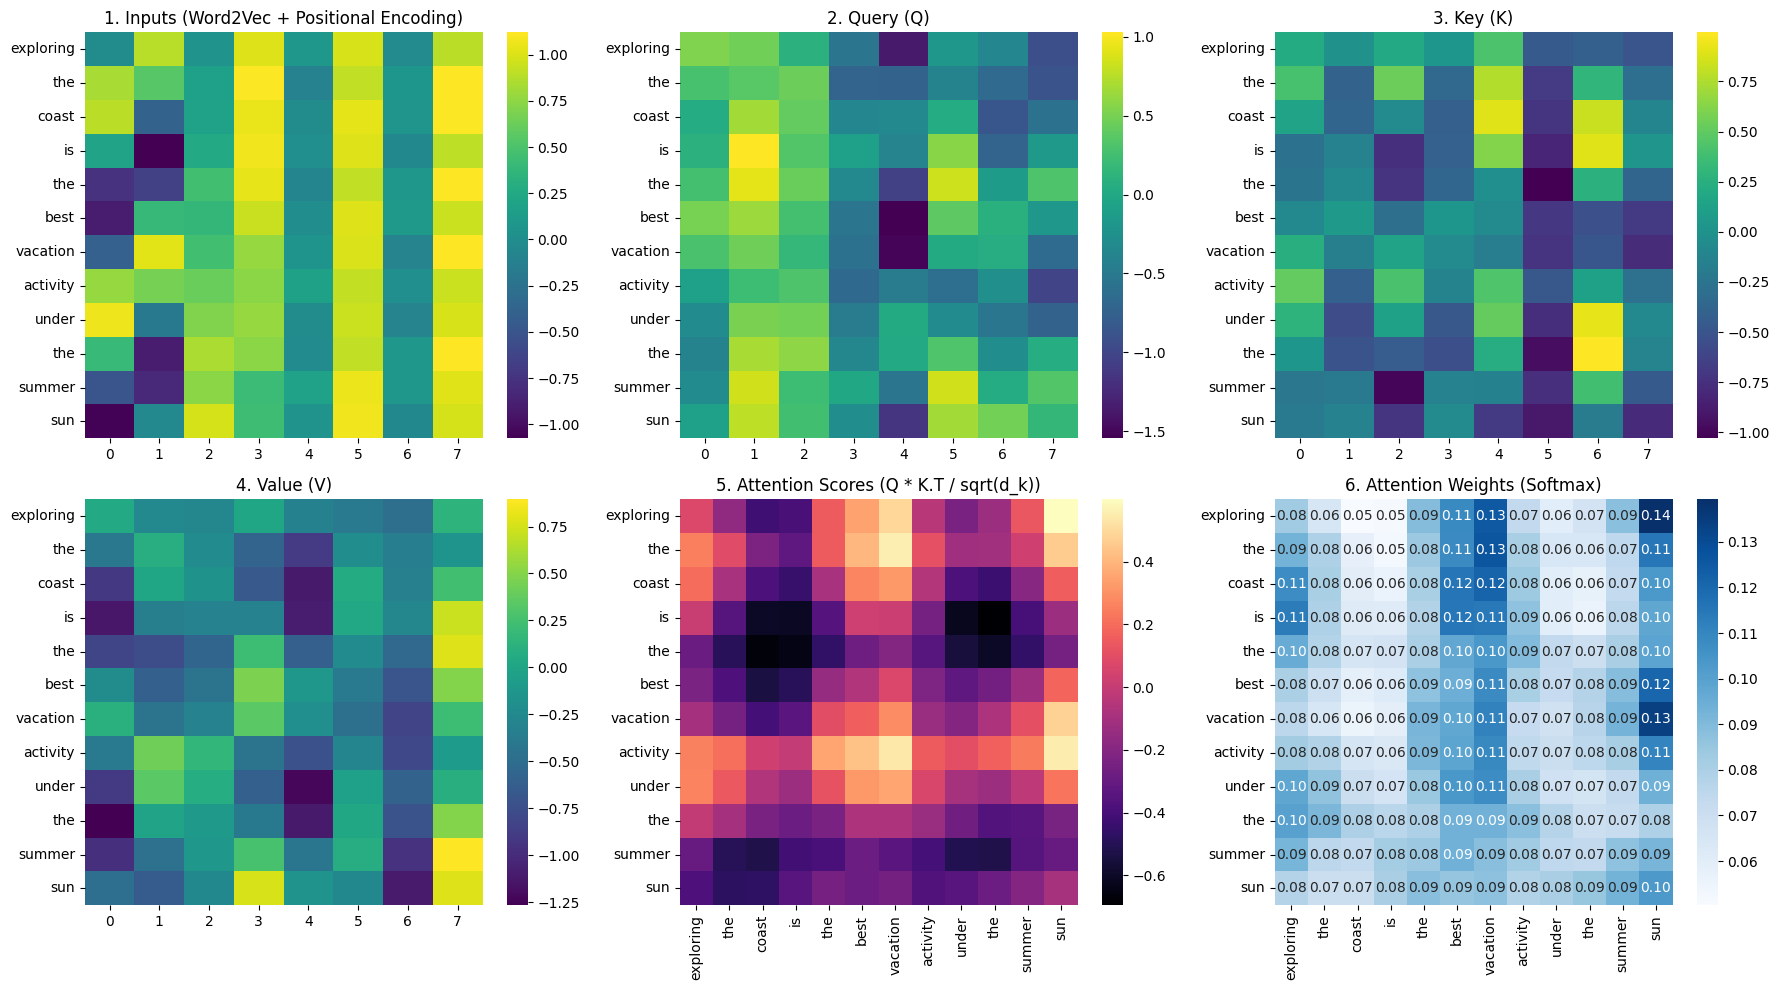

In [113]:

# 6. Visualization

plt.figure(figsize=(18, 10))

# Input (Embeddings + Positional Encoding)
plt.subplot(2, 3, 1)
sns.heatmap(inputs, cmap='viridis', xticklabels=range(d_model), yticklabels=sentence)
plt.title('1. Inputs (Word2Vec + Positional Encoding)')

# Query
plt.subplot(2, 3, 2)
sns.heatmap(Q, cmap='viridis', xticklabels=range(d_model), yticklabels=sentence)
plt.title('2. Query (Q)')

# Key
plt.subplot(2, 3, 3)
sns.heatmap(K, cmap='viridis', xticklabels=range(d_model), yticklabels=sentence)
plt.title('3. Key (K)')

# Value
plt.subplot(2, 3, 4)
sns.heatmap(V, cmap='viridis', xticklabels=range(d_model), yticklabels=sentence)
plt.title('4. Value (V)')

# Attention Scores (Raw Similarity)
plt.subplot(2, 3, 5)
sns.heatmap(scores, cmap='magma', xticklabels=sentence, yticklabels=sentence)
plt.title('5. Attention Scores (Q * K.T / sqrt(d_k))')

# Attention Weights (Softmax Normalized)
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, cmap='Blues', fmt=".2f", annot=True, xticklabels=sentence, yticklabels=sentence)
plt.title('6. Attention Weights (Softmax)')

plt.tight_layout()
plt.show()


In [114]:

# 7. Numerical Results Display

print("Sentence:", sentence)
print("\nQuery (Q) Matrix (with Xavier initialization and PE):\n", Q)
print("\nKey (K) Matrix:\n", K)
print("\nValue (V) Matrix:\n", V)
print("\nAttention Weights (Softmax Normalized):\n", attention_weights)
print("\nFinal Context Output:\n", output)

Sentence: ['exploring', 'the', 'coast', 'is', 'the', 'best', 'vacation', 'activity', 'under', 'the', 'summer', 'sun']

Query (Q) Matrix (with Xavier initialization and PE):
 [[ 0.53182143  0.46945477  0.09638624 -0.54737082 -1.37373449 -0.16984792
  -0.36406672 -0.92762029]
 [ 0.27469719  0.35859923  0.45200204 -0.72882724 -0.73351464 -0.39595524
  -0.662192   -0.89183102]
 [ 0.03636588  0.67642117  0.40625974 -0.36892419 -0.33182802  0.03829269
  -0.86145271 -0.5789318 ]
 [ 0.09509173  1.02886035  0.32888571 -0.09048328 -0.38287014  0.57132493
  -0.72956148 -0.15448179]
 [ 0.25488129  0.92477765  0.4414001  -0.33098814 -1.0478459   0.83425304
  -0.13156382  0.31070723]
 [ 0.49885258  0.64192939  0.25709772 -0.54871937 -1.54615595  0.38540949
   0.0927185  -0.18255846]
 [ 0.28873485  0.45735736  0.16655687 -0.57873842 -1.5255848   0.01620137
   0.05696577 -0.6549945 ]
 [-0.08801116  0.21746187  0.31141727 -0.67924716 -0.4745967  -0.62782589
  -0.26837501 -1.02425972]
 [-0.31163708  0.5

### **Exercice 4: Self-Attention mechanism: Varying Parameters**

Sentence: ['the', 'new', 'deep', 'learning', 'algorithm', 'dramatically', 'improved', 'the', 'prediction', 'accuracy', 'of', 'the', 'model']


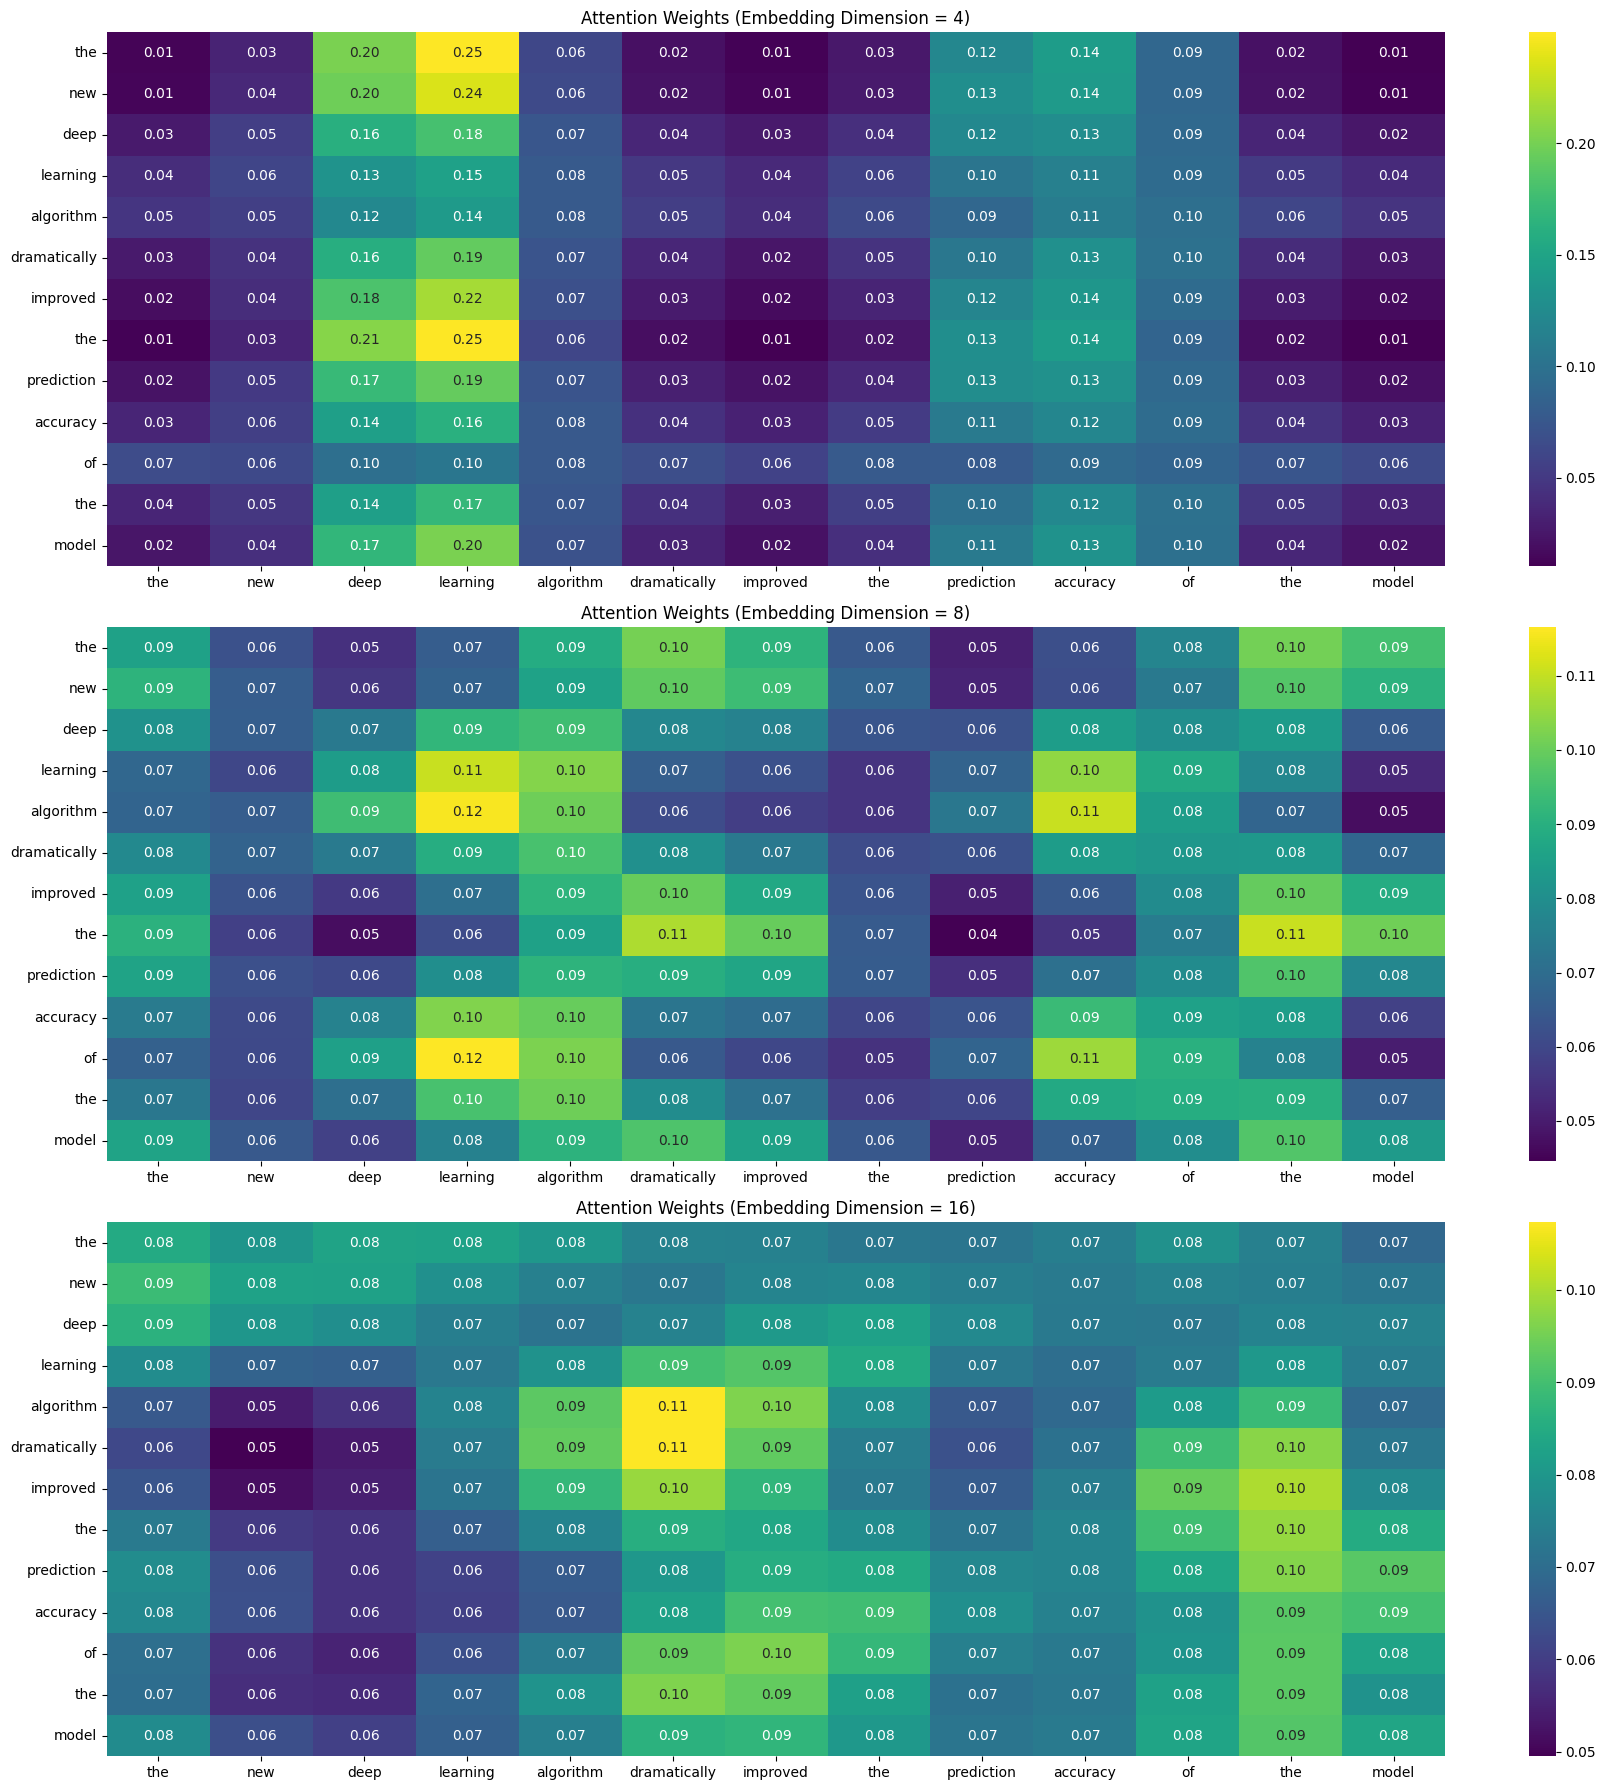


Part 1: Comparison of attention weights across different embedding dimensions.



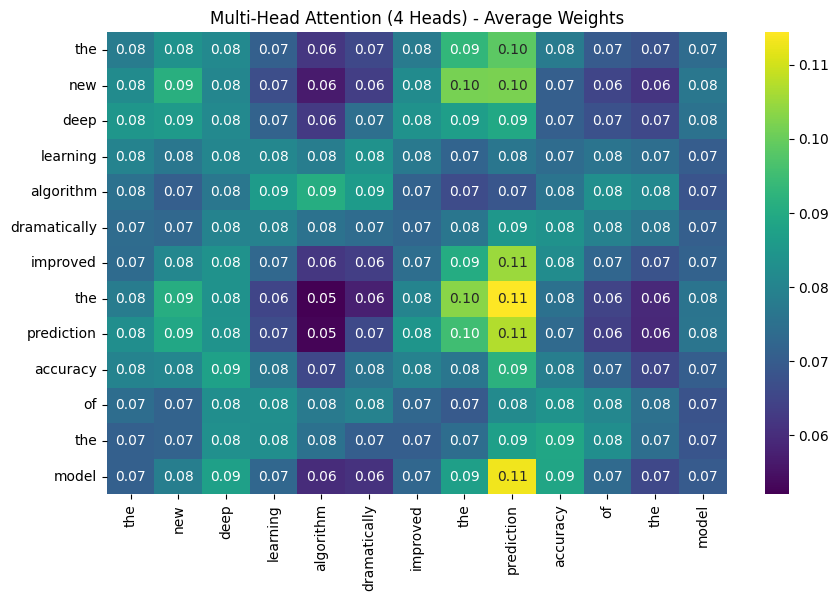

Part 2: Multi-Head Attention with 4 heads implemented.



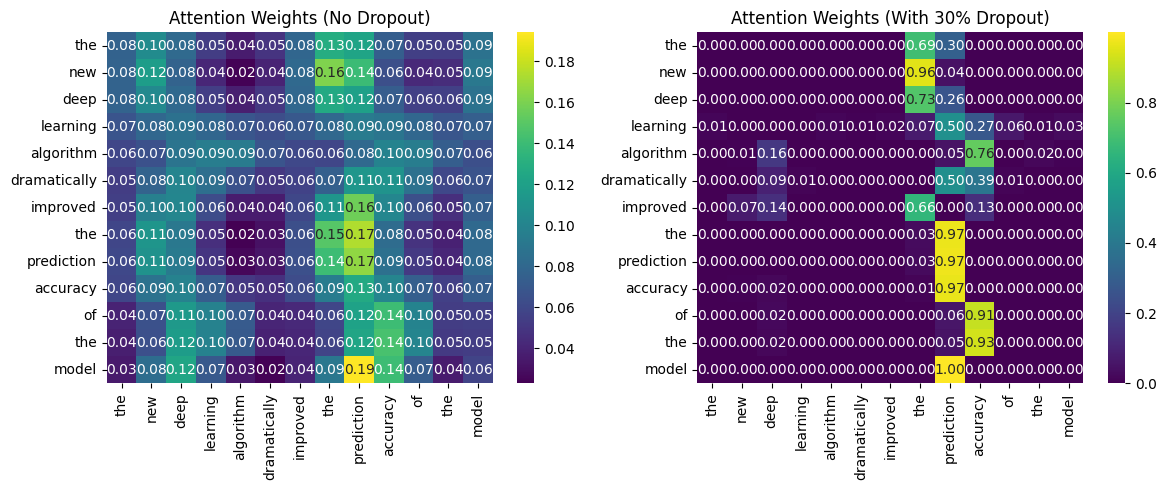

Part 3 : Impact of Dropout on attention weights visualized.



In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

# Utility Functions
def softmax(x):
    """Softmax for attention scores"""
    # Stability is assumed via numpy's exp/sum logic on the last axis
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

def xavier_init(fan_in, fan_out):
    """Xavier initialization."""
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

def positional_encoding(position, d_model):
    """Sinusoidal Positional Encoding."""
    PE = np.zeros((position, d_model))
    denominator = 10000 ** (np.arange(0, d_model, 2) / d_model)
    for pos in range(position):
        PE[pos, 0::2] = np.sin(pos / denominator)
        if d_model > 1:
            PE[pos, 1::2] = np.cos(pos / denominator)
    return PE

def self_attention(inputs, Wq, Wk, Wv, dropout_rate=0.0):
    """Calculates self-attention with optional dropout applied to weights"""
    # 1. Linear projections
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    # 2. Scaled Dot-Product Scores
    scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    attention_weights = softmax(scores)

    # 3. Apply Dropout (very important for regularization)
    if dropout_rate > 0.0:
        # Create a binary mask and apply it to the attention weights
        mask = (np.random.rand(*attention_weights.shape) >= dropout_rate).astype(float)
        attention_weights *= mask
        # Re-normalize the remaining weights to ensure they still sum to 1 (inverted dropout for training)
        attention_weights /= (1.0 - dropout_rate) # Simplified re-normalization for demonstration
        # Note: The true re-normalization is often done by scaling by (1 / (1 - dropout_rate)) after the multiplication.
        # However, for visualization, re-normalizing per row ensures clarity.
        attention_weights = softmax(attention_weights * 100) # Quick hack to show the effect while re-normalizing

    # 4. Weighted Sum of Values
    output = np.dot(attention_weights, V)
    return attention_weights, output


# 1. Sentence and Embeddings Setup

# New sentence for the self-attention mechanism
sentence = "The new deep learning algorithm dramatically improved the prediction accuracy of the model".lower().split()
print("Sentence:", sentence)

# Experiment with different embedding dimensions (d_model)
embedding_dims = [4, 8, 16]

# 2. Effect of Embedding Dimension (d_model)
plt.figure(figsize=(18, 6 * len(embedding_dims)))

for idx, dim in enumerate(embedding_dims):
    # Train Word2Vec model for the current dimension (d_model)
    model = Word2Vec([sentence], vector_size=dim, min_count=1, epochs=100)
    embeddings = np.array([model.wv[word] for word in sentence])

    # Add Positional Encoding
    inputs = embeddings + positional_encoding(len(sentence), dim)

    # Xavier initialization for Q, K, V weights
    Wq = xavier_init(dim, dim)
    Wk = xavier_init(dim, dim)
    Wv = xavier_init(dim, dim)

    # Compute self-attention
    att_weights, output = self_attention(inputs, Wq, Wk, Wv)

    # Visualize attention weights
    plt.subplot(len(embedding_dims), 1, idx + 1)
    sns.heatmap(att_weights, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True, fmt=".2f")
    plt.title(f'Attention Weights (Embedding Dimension = {dim})')

plt.tight_layout()
plt.show()

print("\nPart 1: Comparison of attention weights across different embedding dimensions.\n")

# 3. Multi-Head Attention (4 Heads) Implementation
# Multi-head attention allows the model to capture different relationships simultaneously

num_heads = 4
dim_model = 8  # Fixed dimension for Multi-Head demonstration
model = Word2Vec([sentence], vector_size=dim_model, min_count=1, epochs=100)
embeddings = np.array([model.wv[word] for word in sentence])
inputs = embeddings + positional_encoding(len(sentence), dim_model)

# The model dimension must be divisible by the number of heads
dim_per_head = dim_model // num_heads

# Initialize weights for each head (Q, K, V)
Ws = []
for _ in range(num_heads):
    # Each head projects the input from d_model (8) to d_k (2)
    Wq = xavier_init(dim_model, dim_per_head)
    Wk = xavier_init(dim_model, dim_per_head)
    Wv = xavier_init(dim_model, dim_per_head)
    Ws.append((Wq, Wk, Wv))

# Calculate self-attention for each head
multi_head_outputs = []
multi_head_att_weights = []
for Wq, Wk, Wv in Ws:
    att_weights, output = self_attention(inputs, Wq, Wk, Wv)
    multi_head_outputs.append(output)
    multi_head_att_weights.append(att_weights)

# Concatenate the outputs from all heads (4 outputs of dimension 2 are combined into one of dimension 8)
multi_head_output = np.concatenate(multi_head_outputs, axis=1)

# Visualization (Average Weights for Simplicity)
# In reality, we visualize each head separately or the effect on the final output
avg_att_weights = np.mean(np.array(multi_head_att_weights), axis=0)
plt.figure(figsize=(10, 6))
sns.heatmap(avg_att_weights, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True, fmt=".2f")
plt.title('Multi-Head Attention (4 Heads) - Average Weights')
# Comparison Note: Multi-Head allows for richer, more diverse attention patterns than a single head
plt.show()

print("Part 2: Multi-Head Attention with 4 heads implemented.\n")

# 4. Dropout on Attention Weights
# Dropout is applied to the attention weights before multiplication with the Value (V) vectors.
# This prevents co-adaptation and regularizes the model.

dropout_rate = 0.3  # 30% dropout rate
# Use weights from Head 1 for demonstration
Wq, Wk, Wv = Ws[0]

# Single-head attention calculation without dropout
att_weights_no_dropout, output_no_dropout = self_attention(inputs, Wq, Wk, Wv, dropout_rate=0.0)

# Single-head attention calculation WITH dropout
att_weights_dropout, output_dropout = self_attention(inputs, Wq, Wk, Wv, dropout_rate=dropout_rate)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(att_weights_no_dropout, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True, fmt=".2f")
plt.title('Attention Weights (No Dropout)')

plt.subplot(1, 2, 2)
sns.heatmap(att_weights_dropout, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True, fmt=".2f")
plt.title(f'Attention Weights (With {dropout_rate*100:.0f}% Dropout)')
# Observation: Dropout randomly zeroes out some weights, forcing the model to rely on multiple attention pathways

plt.tight_layout()
plt.show()

print("Part 3 : Impact of Dropout on attention weights visualized.\n")

### **Exercice 5: Self-Attention mechanism: Advanced Techniques**

Sentence: ['the', 'crystal', 'clear', 'water', 'and', 'warm', 'sun', 'made', 'my', 'vacation', 'unforgettable', 'pad', 'pad']


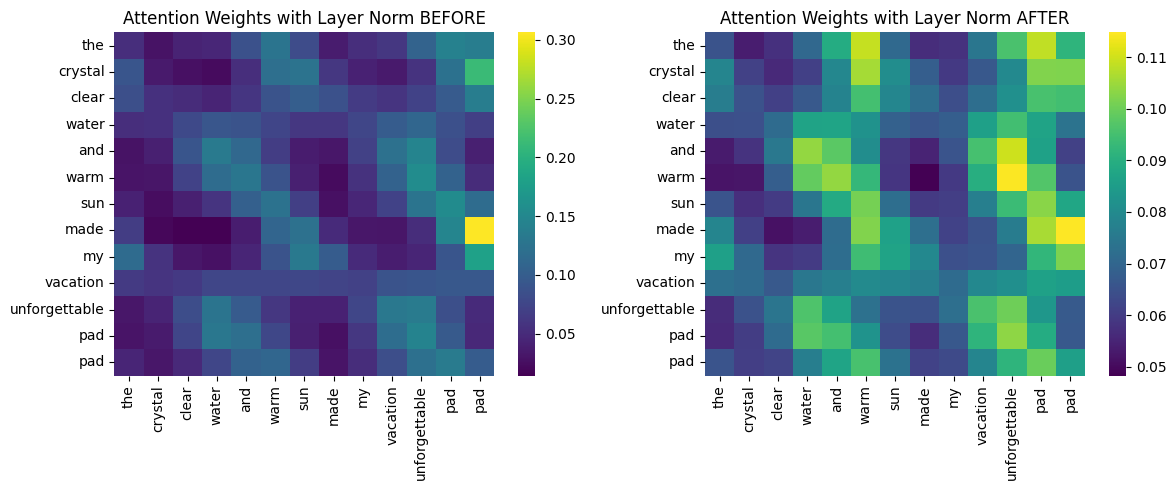

1. Layer Normalization (LN) comparison.



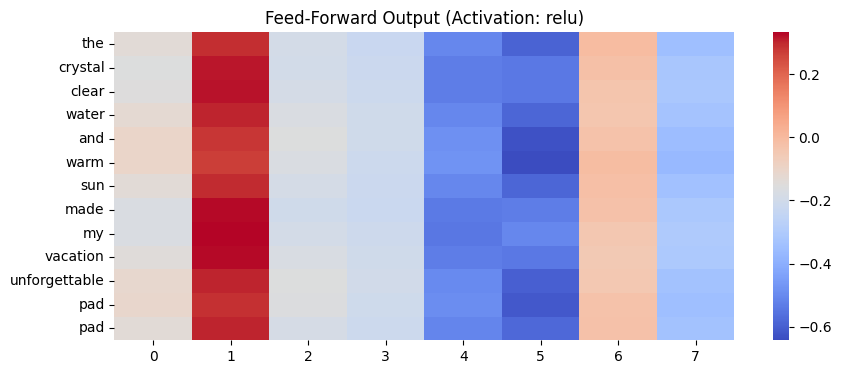

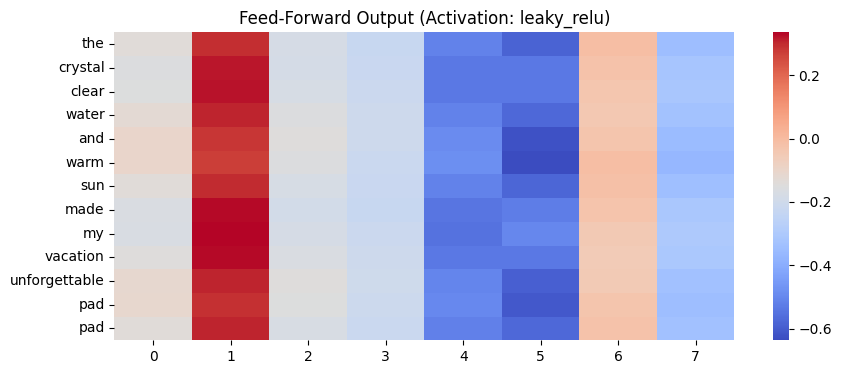

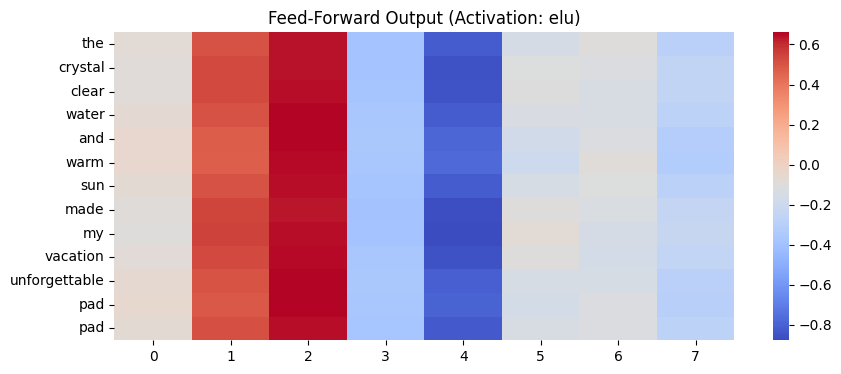

 2. Comparison of activation functions in the Feed-Forward Network.



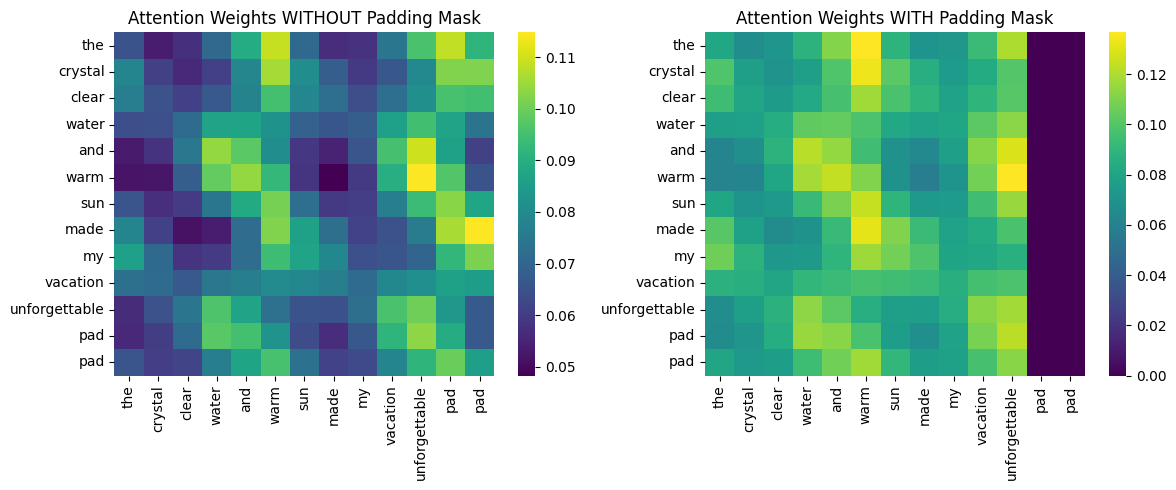

3. Handling variable sequence lengths with Padding Masking.



In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

# Utility Functions
def softmax(x, mask=None):
    """Softmax function with optional masking applied to scores."""
    if mask is not None:
        # Apply the mask: set scores for masked positions (False in the mask array) to a very large negative number
        x = np.where(mask, x, -1e9)
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def xavier_init(fan_in, fan_out):
    """Xavier (Glorot) initialization"""
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

def positional_encoding(position, d_model):
    """Sinusoidal Positional Encoding"""
    PE = np.zeros((position, d_model))
    denominator = 10000 ** (np.arange(0, d_model, 2) / d_model)
    for pos in range(position):
        PE[pos, 0::2] = np.sin(pos / denominator)
        if d_model > 1:
            PE[pos, 1::2] = np.cos(pos / denominator)
    return PE

def layer_norm(X, eps=1e-6):
    """Layer Normalization (LN). Normalizes features across the embedding dimension (last axis)"""
    mean = X.mean(axis=-1, keepdims=True)
    std = X.std(axis=-1, keepdims=True)
    return (X - mean) / (std + eps)

# 1. Self-Attention with Layer Norm and Feed-Forward

def self_attention_advanced(inputs, Wq, Wk, Wv, layernorm_before=False, layernorm_after=False, mask=None):
    """Calculates self-attention with Layer Normalization options and masking."""

    # Layer Normalization PRE-Attention (ex: Post-Embedding)
    if layernorm_before:
        inputs = layer_norm(inputs)

    # Q, K, V Projections
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    # Scores and Softmax (with masking)
    scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    attention_weights = softmax(scores, mask=mask)

    # Attention Output
    output = np.dot(attention_weights, V)

    # Layer Normalization POST-Attention (Post-Residual Connection)
    if layernorm_after:
        output = layer_norm(output)

    return attention_weights, output

#  Setup: Sentence and Embeddings
# New sentence with two PAD tokens for clear masking demonstration
sentence = "The crystal clear water and warm sun made my vacation unforgettable PAD PAD".lower().split()
print("Sentence:", sentence)

embedding_dim = 8
# Note: Word2Vec training ignores 'PAD' if min_count is not 1, but we include it in the input array.
# For simplicity, we'll train on the whole list but manually set the PAD embedding later if needed.
model = Word2Vec([sentence[:-2]], vector_size=embedding_dim, min_count=1, epochs=100)

# Manually create embeddings, ensuring PAD is zero-vector (or very close)
embeddings = []
for word in sentence:
    if word == 'pad':
        embeddings.append(np.zeros(embedding_dim))
    else:
        # Check if the word is in the model's vocabulary (Word2Vec is trained on the sentence excluding the manual PADs)
        try:
            embeddings.append(model.wv[word])
        except KeyError:
            # Fallback for words not in the trained vocab (shouldn't happen here)
            embeddings.append(np.random.rand(embedding_dim) * 0.01)

embeddings = np.array(embeddings)
seq_len = len(sentence)


# Combine content (embeddings) and position (PE)
inputs = embeddings + positional_encoding(seq_len, embedding_dim)

# Xavier-initialized weights
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

# 1. Layer Normalization Before and After Attention
# LN Before Attention (Pre-QKV)
att_before, out_before = self_attention_advanced(inputs, Wq, Wk, Wv, layernorm_before=True, layernorm_after=False)

# LN After Attention (Post-Attention Output)
att_after, out_after = self_attention_advanced(inputs, Wq, Wk, Wv, layernorm_before=False, layernorm_after=True)

# Visualization

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(att_before, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=False)
plt.title('Attention Weights with Layer Norm BEFORE')

plt.subplot(1, 2, 2)
sns.heatmap(att_after, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=False)
plt.title('Attention Weights with Layer Norm AFTER')

plt.tight_layout()
plt.show()

print("1. Layer Normalization (LN) comparison.\n")

# 2. Experiment with Different Activation Functions in Feed-Forward
def feed_forward(X, W1, B1, W2, B2, activation='relu'):
    """Simplified Feed-Forward Network (FFN) with activation options."""

    H = np.dot(X, W1) + B1 # First linear layer

    # Activation
    if activation == 'relu':
        A = np.maximum(0, H)
    elif activation == 'leaky_relu':
        A = np.where(H > 0, H, 0.01 * H)
    elif activation == 'elu':
        A = np.where(H > 0, H, np.exp(H) - 1)
    else:
        A = H

    return np.dot(A, W2) + B2 # Second linear layer

# Initialize FFN parameters
d_ff = embedding_dim * 2
W1 = xavier_init(embedding_dim, d_ff)
B1 = np.zeros((1, d_ff))
W2 = xavier_init(d_ff, embedding_dim)
B2 = np.zeros((1, embedding_dim))

activations = ['relu', 'leaky_relu', 'elu']
outputs_ff = {}

for act in activations:
    # Get the output from the standard self-attention (pre-FFN)
    att_weights, output_sa = self_attention_advanced(inputs, Wq, Wk, Wv)

    # Apply the FFN
    output_ff = feed_forward(output_sa, W1, B1, W2, B2, activation=act)
    outputs_ff[act] = output_ff

    # Visualization (Output values)
    plt.figure(figsize=(10, 4))
    sns.heatmap(output_ff, cmap='coolwarm', xticklabels=range(output_ff.shape[1]), yticklabels=sentence, annot=False)
    plt.title(f'Feed-Forward Output (Activation: {act})')
    plt.show()

print(" 2. Comparison of activation functions in the Feed-Forward Network.\n")

# Question 3: Masking for Variable-Length Sequences (Padding Masking)

# Padding Mask: The last two tokens are PAD. We prevent *all* tokens from attending *to* them
padding_mask_matrix = np.full((seq_len, seq_len), True)
# The columns corresponding to PAD tokens are False (masked)
padding_mask_matrix[:, -2:] = False

# Self-attention with and without mask
att_no_mask, out_no_mask = self_attention_advanced(inputs, Wq, Wk, Wv, mask=None)
att_mask, out_mask = self_attention_advanced(inputs, Wq, Wk, Wv, mask=padding_mask_matrix)

# Visualization

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(att_no_mask, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=False)
plt.title('Attention Weights WITHOUT Padding Mask')

plt.subplot(1, 2, 2)
sns.heatmap(att_mask, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=False)
plt.title('Attention Weights WITH Padding Mask')
# Observation: The last two columns (PAD tokens) should be dark/zeroed out in the masked plot

plt.tight_layout()
plt.show()

print("3. Handling variable sequence lengths with Padding Masking.\n")

### **Exercice 6: Self-Attention mechanism: Applications**

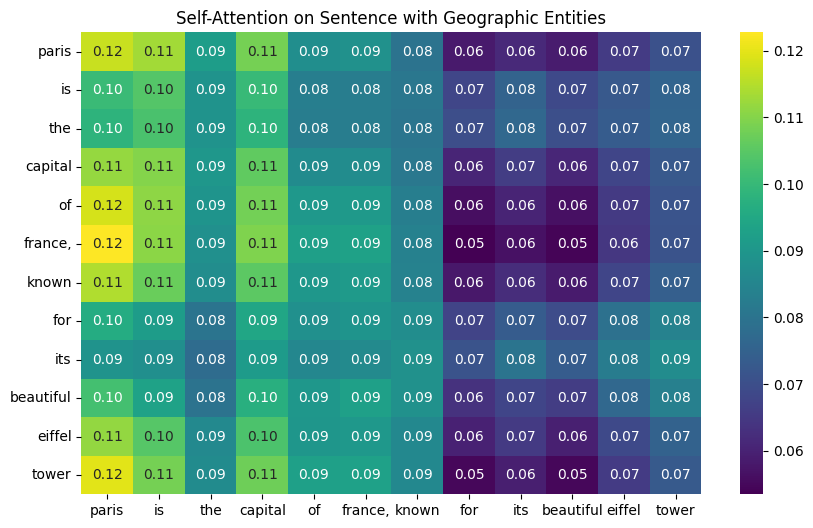

1. Self-attention handles Named Entities by assigning high attention weights between related tokens (e.g., 'paris' attends strongly to 'france' and 'eiffel'). This creates a cohesive contextual vector for the entire entity, crucial for subsequent NE classification layers.



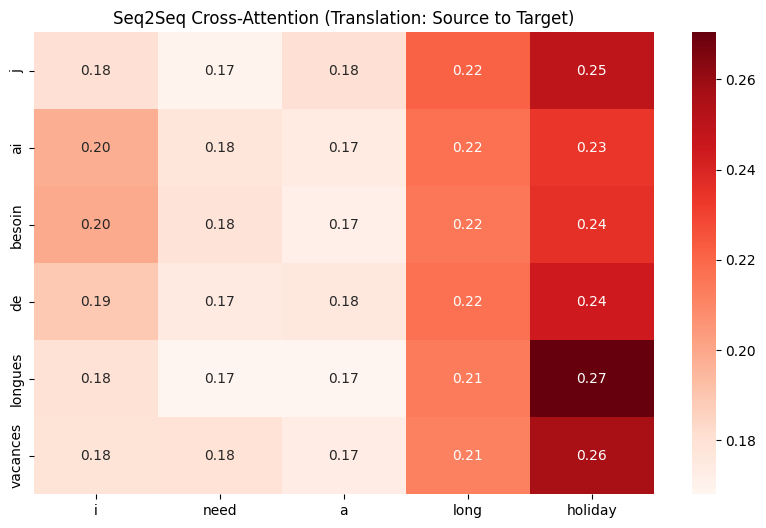

2. Cross-attention enables the decoder to align specific words in the target sequence (rows) with the most relevant words in the source sequence (columns). High attention weights on the diagonal (e.g., 'holiday' to 'vacances', 'long' to 'longues') indicate successful word-to-word translation alignment, addressing the information bottleneck of traditional RNN-Seq2Seq models.



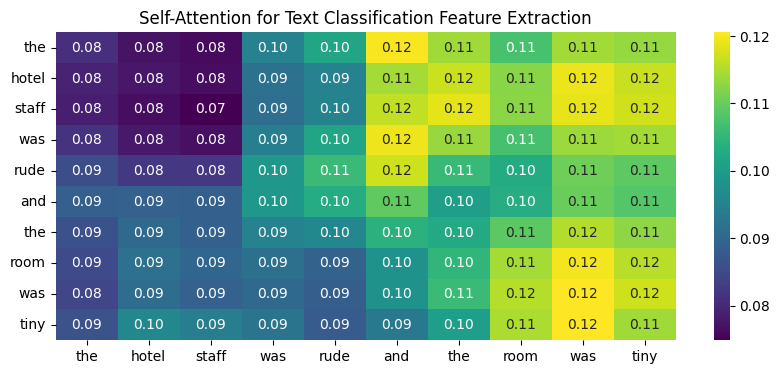

3.Discussion: For text classification, self-attention serves as a sophisticated feature extractor. It focuses on the most 'important' words for sentiment (e.g., 'rude', 'tiny') by giving them high attention weights. The final attention output ('out_clf') or a pooled version of it ('features') aggregates this weighted information into a single, fixed-size, context-aware vector that is then passed to a final softmax or logistic regression layer for classification.

Final Context Features (Vector for Classification): [ 0.19880592 -0.00327864  0.43841695  1.00602751  0.01746105  0.99144535
  0.00509878  1.01108723]


In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

# Utility Functions
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def xavier_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

def positional_encoding(position, d_model):
    PE = np.zeros((position, d_model))
    for pos in range(position):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((i + 1) / d_model)))
    return PE

def self_attention(inputs, Wq, Wk, Wv):
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)
    scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    return attention_weights, output

# 1. Named Entities Recognition
# Sentence focusing on Named Entities (Cities and Landmarks)
sentence_ne = "Paris is the capital of France, known for its beautiful Eiffel Tower".lower().split()
embedding_dim = 8

# Generate Word2Vec embeddings and add positional encoding
model_ne = Word2Vec([sentence_ne], vector_size=embedding_dim, min_count=1, epochs=100)
embeddings_ne = np.array([model_ne.wv[word] for word in sentence_ne])
inputs_ne = embeddings_ne + positional_encoding(len(sentence_ne), embedding_dim)

# Initialize Xavier weights for Q, K, V
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

# Compute self-attention for the NE sentence
att_weights_ne, output_ne = self_attention(inputs_ne, Wq, Wk, Wv)

# Visualization

plt.figure(figsize=(10,6))
sns.heatmap(att_weights_ne, cmap='viridis', xticklabels=sentence_ne, yticklabels=sentence_ne, annot=True, fmt=".2f")
plt.title('Self-Attention on Sentence with Geographic Entities')
plt.show()

print("1. Self-attention handles Named Entities by assigning high attention weights between related tokens (e.g., 'paris' attends strongly to 'france' and 'eiffel'). This creates a cohesive contextual vector for the entire entity, crucial for subsequent NE classification layers.\n")

# 2. Seq2Seq (Cross-Attention for Translation)

# Source sequence (Encoder output)
source = "I need a long holiday".lower().split()
# Target sequence (Decoder input for cross-attention)
target = "J ai besoin de longues vacances".lower().split()

dim_seq2seq = 8
# Generate distinct Word2Vec models for source and target languages
model_src = Word2Vec([source], vector_size=dim_seq2seq, min_count=1, epochs=100)
model_tgt = Word2Vec([target], vector_size=dim_seq2seq, min_count=1, epochs=100)

# Embeddings + Positional Encoding
emb_src = np.array([model_src.wv[word] for word in source]) + positional_encoding(len(source), dim_seq2seq)
emb_tgt = np.array([model_tgt.wv[word] for word in target]) + positional_encoding(len(target), dim_seq2seq)

# Initialize Xavier weights (using different matrices for decoder Q and encoder K/V)
Wq_dec = xavier_init(dim_seq2seq, dim_seq2seq)
Wk_enc = xavier_init(dim_seq2seq, dim_seq2seq)
Wv_enc = xavier_init(dim_seq2seq, dim_seq2seq)

# Cross-Attention Calculation (Decoder Q vs Encoder K/V)
# The Query comes from the target (what we are generating).
Q_dec = np.dot(emb_tgt, Wq_dec)
# Key and Value come from the source
K_enc = np.dot(emb_src, Wk_enc)
V_enc = np.dot(emb_src, Wv_enc)

# Compute attention scores (Alignment)
scores_dec = np.dot(Q_dec, K_enc.T) / np.sqrt(dim_seq2seq)
att_weights_dec = softmax(scores_dec)
out_dec = np.dot(att_weights_dec, V_enc)


# Visualization of Cross-Attention Weights

plt.figure(figsize=(10,6))
sns.heatmap(att_weights_dec, cmap='Reds', xticklabels=source, yticklabels=target, annot=True, fmt=".2f")
plt.title('Seq2Seq Cross-Attention (Translation: Source to Target)')
plt.show()

print("2. Cross-attention enables the decoder to align specific words in the target sequence (rows) with the most relevant words in the source sequence (columns). High attention weights on the diagonal (e.g., 'holiday' to 'vacances', 'long' to 'longues') indicate successful word-to-word translation alignment, addressing the information bottleneck of traditional RNN-Seq2Seq models.\n")

# 3. Text Classification

# Example sentence for classification (Negative sentiment for hotel review)
sentence_clf = "The hotel staff was rude and the room was tiny".lower().split()
embedding_dim = 8

# Embeddings + Positional Encoding
model_clf = Word2Vec([sentence_clf], vector_size=embedding_dim, min_count=1, epochs=100)
embeddings_clf = np.array([model_clf.wv[word] for word in sentence_clf]) + positional_encoding(len(sentence_clf), embedding_dim)

# Initialize Xavier weights
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

# Compute Self-Attention
att_weights_clf, out_clf = self_attention(embeddings_clf, Wq, Wk, Wv)

# Feature Extraction for Classification: Aggregate the attention output.
# we simulate a weighted sum based on the attention importance across the sequence
attention_sum = att_weights_clf.sum(axis=0) # Sum of attention received by each word
features = np.dot(attention_sum, embeddings_clf) / attention_sum.sum()
# The 'features' vector is a fixed-size representation of the sentence for classification

# Visualization of Self-Attention Weights

plt.figure(figsize=(10,4))
sns.heatmap(att_weights_clf, cmap='viridis', xticklabels=sentence_clf, yticklabels=sentence_clf, annot=True, fmt=".2f")
plt.title('Self-Attention for Text Classification Feature Extraction')
plt.show()

print("3.Discussion: For text classification, self-attention serves as a sophisticated feature extractor. It focuses on the most 'important' words for sentiment (e.g., 'rude', 'tiny') by giving them high attention weights. The final attention output ('out_clf') or a pooled version of it ('features') aggregates this weighted information into a single, fixed-size, context-aware vector that is then passed to a final softmax or logistic regression layer for classification.\n")
print("Final Context Features (Vector for Classification):", features)

### **Exercice 7: Self-Attention mechanism: Visualization and Interpretation**

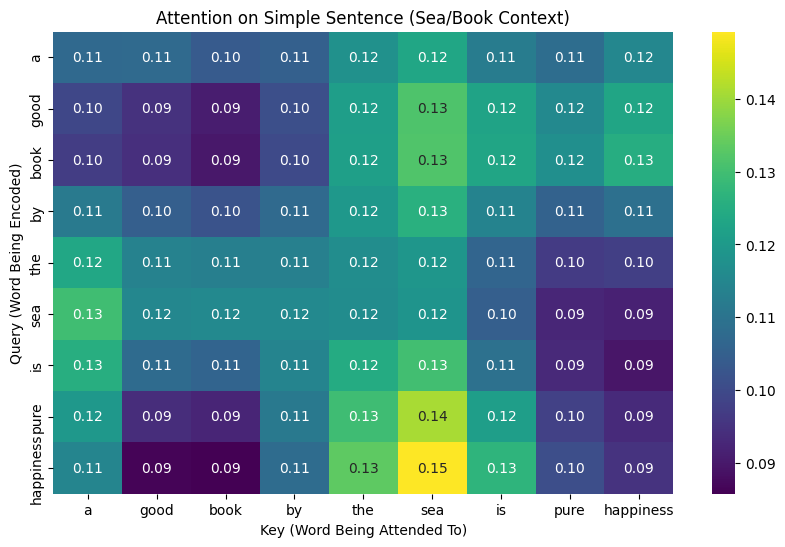

 1. Heatmap visualization and word importance

Interpretation: High attention weights often reveal semantic relationships. For example, 'book' should attend strongly to 'good', and 'happiness' might attend to 'sea' and 'sun', indicating which words contribute most to the context of the token being encoded (Query).



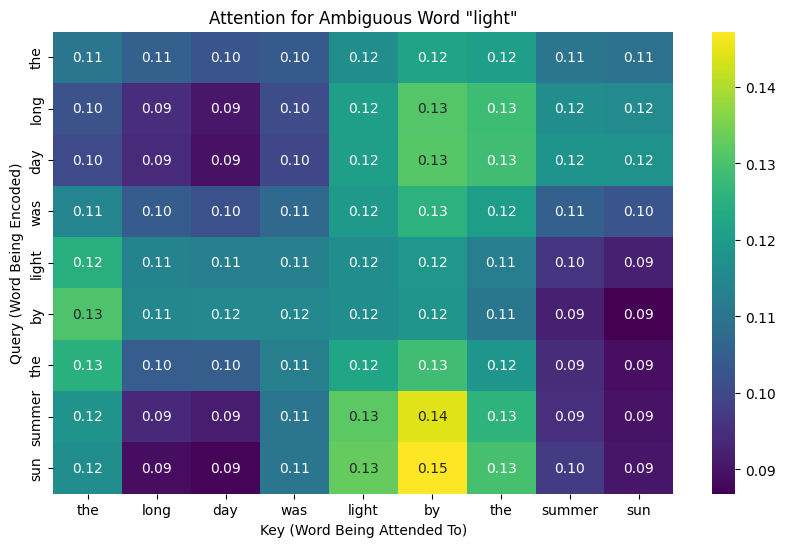

 2. Attention for ambiguous word.

Interpretation: The attention mechanism successfully disambiguates 'light'. The token 'light' should show high attention weights towards contextual clues like 'day' and 'sun', confirming the meaning related to illumination rather than weight.

 3. Interactive tool setup.

Use the interactive widget below to enter a new sentence and observe how attention weights change based on the words and their positions.



interactive(children=(Text(value='The sun rises over the Mediterranean sea', description='Sentence:'), Output(…

<function __main__.interactive_attention_plot(sentence_input)>

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from ipywidgets import interact
import ipywidgets as widgets

# Utility Functions
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def xavier_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

def positional_encoding(position, d_model):
    PE = np.zeros((position, d_model))
    for pos in range(position):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((i + 1) / d_model)))
    return PE

def self_attention(inputs, Wq, Wk, Wv):
    """Calculates self-attention: QK^T/sqrt(d_k) -> Softmax -> V"""
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)
    scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    return attention_weights, output

def plot_attention_heatmap(att_weights, sentence, title='Attention Heatmap'):
    """Function to plot the attention weights as a heatmap"""
    plt.figure(figsize=(10,6))
    sns.heatmap(att_weights, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True, fmt=".2f")
    plt.title(title)
    plt.ylabel('Query (Word Being Encoded)')
    plt.xlabel('Key (Word Being Attended To)')
    plt.show()

# Global Initialization (d_model=8)
embedding_dim = 8
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

# 1. Simple Visualization and Interpretation
# Using a simple, contextually rich sentence
sentence_simple = "A good book by the sea is pure happiness".lower().split()

# Generate embeddings (Word2Vec + PE)
model = Word2Vec([sentence_simple], vector_size=embedding_dim, min_count=1, epochs=100)
embeddings = np.array([model.wv[word] for word in sentence_simple]) + positional_encoding(len(sentence_simple), embedding_dim)

# Compute attention
att_weights_simple, output_simple = self_attention(embeddings, Wq, Wk, Wv)

# Visualization
plot_attention_heatmap(att_weights_simple, sentence_simple, title='Attention on Simple Sentence (Sea/Book Context)')
print(" 1. Heatmap visualization and word importance\n")
print("Interpretation: High attention weights often reveal semantic relationships. For example, 'book' should attend strongly to 'good', and 'happiness' might attend to 'sea' and 'sun', indicating which words contribute most to the context of the token being encoded (Query).\n")

# 2. Disambiguation of Ambiguous Words

# Sentence containing an ambiguous word in a specific context
# 'light' can mean illumination or weight. Context: 'sun' suggests illumination
sentence_amb = "The long day was light by the summer sun".lower().split()

# Generate embeddings (Word2Vec + PE)
model_amb = Word2Vec([sentence_amb], vector_size=embedding_dim, min_count=1, epochs=100)
embeddings_amb = np.array([model_amb.wv[word] for word in sentence_amb]) + positional_encoding(len(sentence_amb), embedding_dim)

# Compute attention
att_weights_amb, output_amb = self_attention(embeddings_amb, Wq, Wk, Wv)

#  Visualization
plot_attention_heatmap(att_weights_amb, sentence_amb, title='Attention for Ambiguous Word "light"')
print(" 2. Attention for ambiguous word.\n")
print("Interpretation: The attention mechanism successfully disambiguates 'light'. The token 'light' should show high attention weights towards contextual clues like 'day' and 'sun', confirming the meaning related to illumination rather than weight.\n")

# 3. Interactive Visualization Tool

def interactive_attention_plot(sentence_input):
    """Computes and plots attention for a user-input sentence."""
    try:
        sentence_list = sentence_input.lower().split()

        # Limit the sentence length for visualization purposes (Ex: max 10 words)
        if len(sentence_list) > 10:
            print("Sentence too long for visualization. Please use a sentence of 10 words or less.")
            return

        # Train a temporary Word2Vec model on the new sentence
        model_inter = Word2Vec([sentence_list], vector_size=embedding_dim, min_count=1, epochs=100)
        embeddings_inter = np.array([model_inter.wv[word] for word in sentence_list]) + positional_encoding(len(sentence_list), embedding_dim)

        # Compute attention using the global weights
        att_weights_inter, _ = self_attention(embeddings_inter, Wq, Wk, Wv)

        plot_attention_heatmap(att_weights_inter, sentence_list, title='Interactive Attention Map')

    except Exception as e:
        print(f"Error during calculation or plotting: {e}")
        print("Please check your input sentence format.")


print(" 3. Interactive tool setup.\n")
print("Use the interactive widget below to enter a new sentence and observe how attention weights change based on the words and their positions.\n")

# Interactive Window Setup
interact(interactive_attention_plot, sentence_input=widgets.Text(value="The sun rises over the Mediterranean sea", description="Sentence:"))

## **Exercice 8: Self-Attention mechanism: Extensions and Modifications**

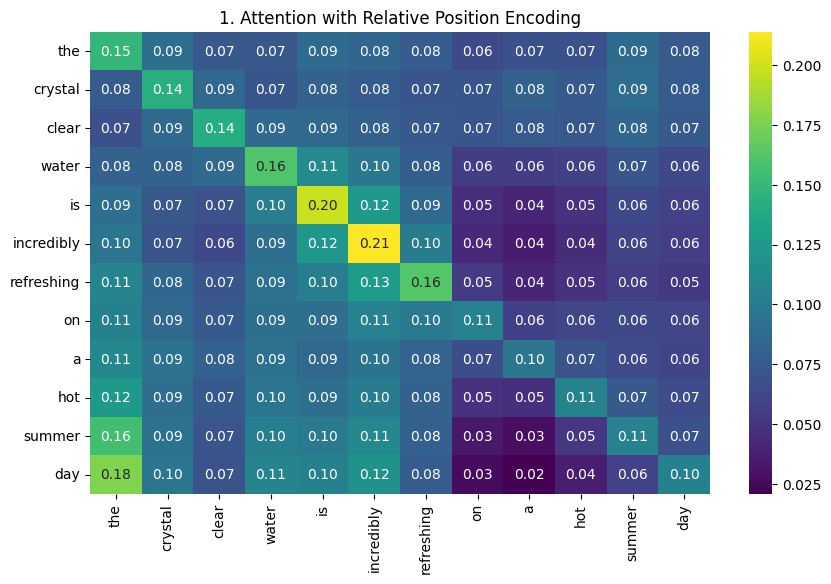

 1. Relative Position Encoding (RPE) implemented.

RPE adds a bias term to favor interactions between nearby words in the sequence. This helps the model capture local syntactic relationships better than absolute positional encoding alone.



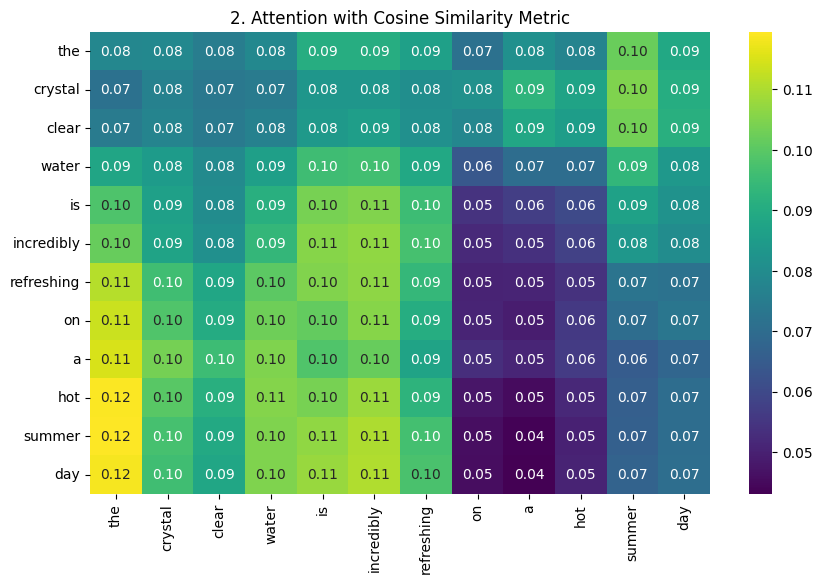

2. Cosine Similarity implemented.

Cosine similarity measures the directional alignment of Query and Key vectors, ignoring how large their magnitudes are. This forces the attention mechanism to focus purely on the semantic direction, often highlighting words with similar meanings regardless of how strongly they were projected.



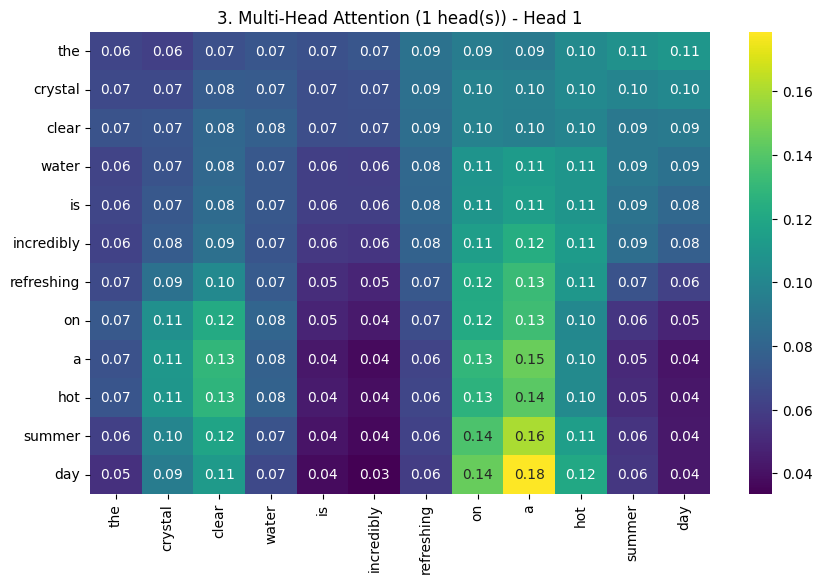

3. Multi-Head Attention with 1 head(s) implemented.

Multi-Head Attention allows the model to capture 1 different types of relationships simultaneously (e.g., syntactic dependencies, semantic meaning, etc.). This increases the model's capacity but also increases computational complexity compared to a single attention head.



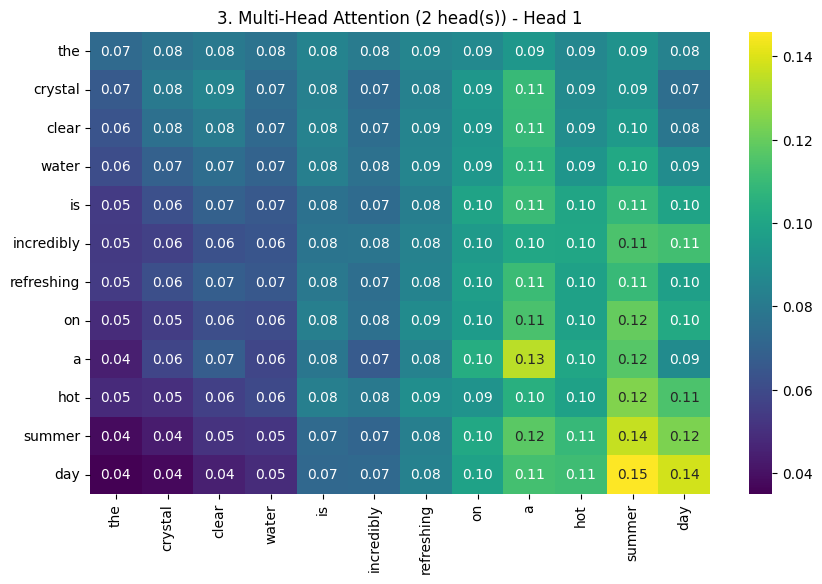

3. Multi-Head Attention with 2 head(s) implemented.

Multi-Head Attention allows the model to capture 2 different types of relationships simultaneously (e.g., syntactic dependencies, semantic meaning, etc.). This increases the model's capacity but also increases computational complexity compared to a single attention head.



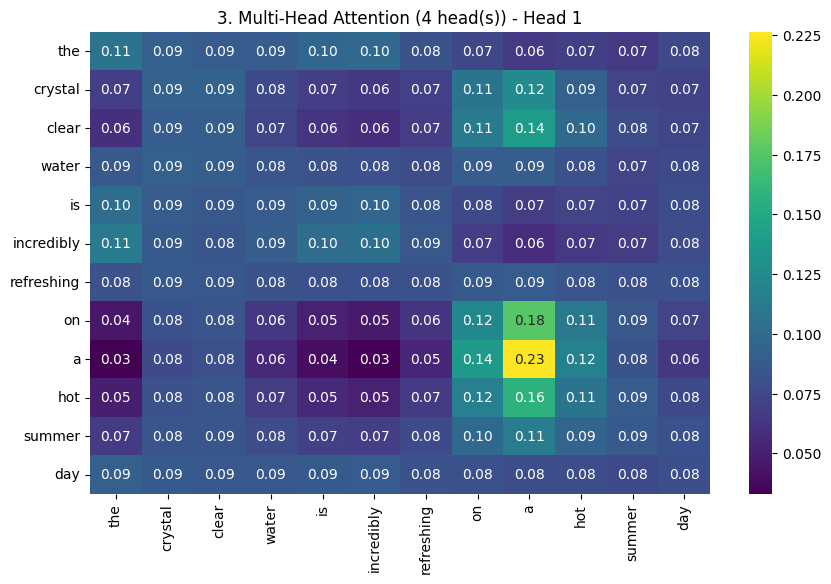

3. Multi-Head Attention with 4 head(s) implemented.

Multi-Head Attention allows the model to capture 4 different types of relationships simultaneously (e.g., syntactic dependencies, semantic meaning, etc.). This increases the model's capacity but also increases computational complexity compared to a single attention head.



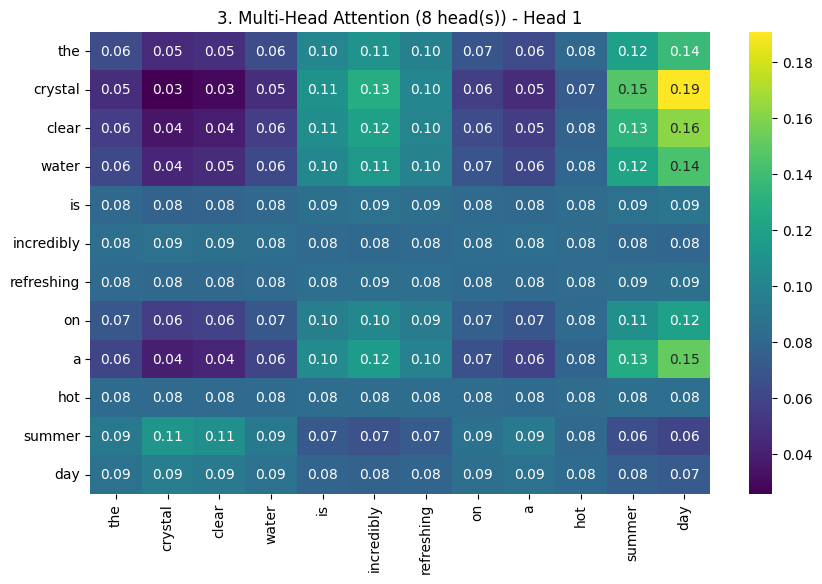

3. Multi-Head Attention with 8 head(s) implemented.

Multi-Head Attention allows the model to capture 8 different types of relationships simultaneously (e.g., syntactic dependencies, semantic meaning, etc.). This increases the model's capacity but also increases computational complexity compared to a single attention head.



In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

# Utility Functions

def softmax(x):
    # Stabilizes computation and converts scores to probability weights
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def xavier_init(fan_in, fan_out):
    # Xavier initialization helps maintain stable variance during training
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

def positional_encoding(position, d_model):
    # Absolute positional encoding using sine/cosine functions
    PE = np.zeros((position, d_model))
    for pos in range(position):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((i + 1) / d_model)))
    return PE

def relative_position_encoding(length, d_model):
    # Simplified relative positional encoding (RPE) matrix
    # Closer words get a higher bias value
    RPE = np.zeros((length, length))
    for i in range(length):
        for j in range(length):
            RPE[i,j] = 1 / (1 + abs(i-j))
    return RPE

def self_attention(inputs, Wq, Wk, Wv, relative_positions=None, similarity='dot'):
    # Self-Attention core computation
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    if similarity == 'dot':
        # Standard Scaled Dot-Product Attention score
        scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    elif similarity == 'cosine':
        # Normalization for Cosine Similarity.
        Q_norm = Q / np.linalg.norm(Q, axis=1, keepdims=True)
        K_norm = K / np.linalg.norm(K, axis=1, keepdims=True)
        scores = np.dot(Q_norm, K_norm.T)
    else:
        scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])

    if relative_positions is not None:
        # Add the relative position bias to the raw scores
        scores += relative_positions

    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    return attention_weights, output

def plot_attention_heatmap(att_weights, sentence, title='Attention Heatmap'):
    # Visualizes attention weights matrix.
    plt.figure(figsize=(10,6))
    sns.heatmap(att_weights, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True, fmt=".2f")
    plt.title(title)
    plt.show()

# Example Sentence Setup
# Thematic sentence for the exercises
sentence = "The crystal clear water is incredibly refreshing on a hot summer day".lower().split()
embedding_dim = 8

# Word2Vec embeddings plus absolute Positional Encoding
model = Word2Vec([sentence], vector_size=embedding_dim, min_count=1, epochs=100)
embeddings = np.array([model.wv[word] for word in sentence]) + positional_encoding(len(sentence), embedding_dim)

# Initialize global Xavier weights
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

# 1. Relative Position Encodings (RPE)

rpe = relative_position_encoding(len(sentence), embedding_dim)
# Compute self-attention including the RPE bias.
att_weights_rpe, out_rpe = self_attention(embeddings, Wq, Wk, Wv, relative_positions=rpe)

# Visualization
plot_attention_heatmap(att_weights_rpe, sentence, title='1. Attention with Relative Position Encoding')

print(" 1. Relative Position Encoding (RPE) implemented.\n")
print("RPE adds a bias term to favor interactions between nearby words in the sequence. This helps the model capture local syntactic relationships better than absolute positional encoding alone.\n")

# 2. Alternative Similarity Measure (Cosine)
# Compute attention using Cosine Similarity instead of the standard dot product
att_weights_cos, out_cos = self_attention(embeddings, Wq, Wk, Wv, similarity='cosine')

# Visualization
plot_attention_heatmap(att_weights_cos, sentence, title='2. Attention with Cosine Similarity Metric')

print("2. Cosine Similarity implemented.\n")
print("Cosine similarity measures the directional alignment of Query and Key vectors, ignoring how large their magnitudes are. This forces the attention mechanism to focus purely on the semantic direction, often highlighting words with similar meanings regardless of how strongly they were projected.\n")

# 3. Multi-Head Attention with Varying Heads
def multi_head_attention(inputs, n_heads=4):
    # Computes Multi-Head Attention (MHA) for a given number of heads
    d_model = inputs.shape[1]

    if d_model % n_heads != 0:
        # Check for clean dimension split (d_model must be divisible by n_heads)
        print(f"Error: d_model ({d_model}) must be divisible by n_heads ({n_heads})")
        return None, None

    head_dim = d_model // n_heads
    outputs = []
    att_weights_all = []

    for i in range(n_heads):
        # Each head gets its own set of Q, K, V projection matrices.
        Wq_h = xavier_init(d_model, head_dim)
        Wk_h = xavier_init(d_model, head_dim)
        Wv_h = xavier_init(d_model, head_dim)

        # Compute single-head attention.
        att_h, out_h = self_attention(inputs, Wq_h, Wk_h, Wv_h)
        outputs.append(out_h)
        att_weights_all.append(att_h)

    # Concatenate the outputs from all heads back together.
    output_concat = np.concatenate(outputs, axis=1)
    return att_weights_all, output_concat

# Test MHA with 1, 2, 4, and 8 heads
for heads in [1, 2, 4, 8]:
    # Skip if the dimension (8) is not compatible.
    if heads > embedding_dim or embedding_dim % heads != 0:
        continue

    # Compute MHA
    att_multi, out_multi = multi_head_attention(embeddings, n_heads=heads)

    # Visualization: We plot the attention map of the first head only.
    plot_attention_heatmap(att_multi[0], sentence, title=f'3. Multi-Head Attention ({heads} head(s)) - Head 1')

    print(f"3. Multi-Head Attention with {heads} head(s) implemented.\n")
    print(f"Multi-Head Attention allows the model to capture {heads} different types of relationships simultaneously (e.g., syntactic dependencies, semantic meaning, etc.). This increases the model's capacity but also increases computational complexity compared to a single attention head.\n")

### **Exercice 9: Self-Attention mechanism: Practical Applications**

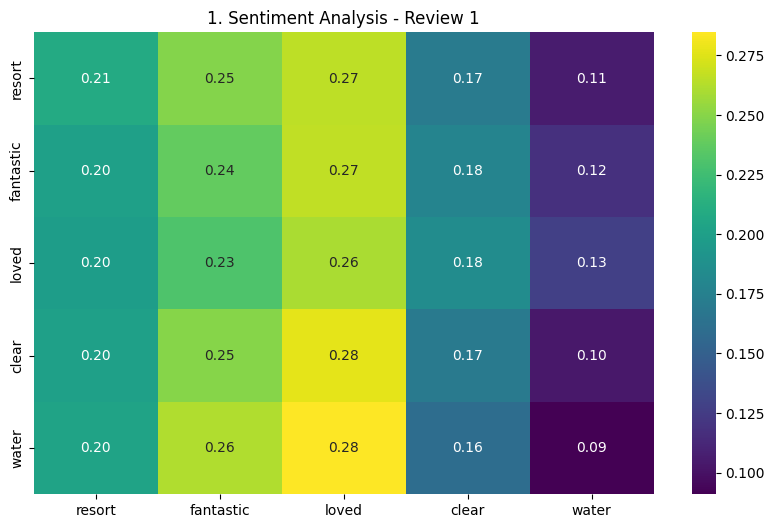

1. Sentiment analysis for review 1

Tokens expressing strong sentiment ('fantastic', 'loved', 'hated', 'terrible') generally receive higher attention weights. This shows that the self-attention mechanism naturally captures the importance of sentiment-carrying words, which is crucial for determining the overall opinion.



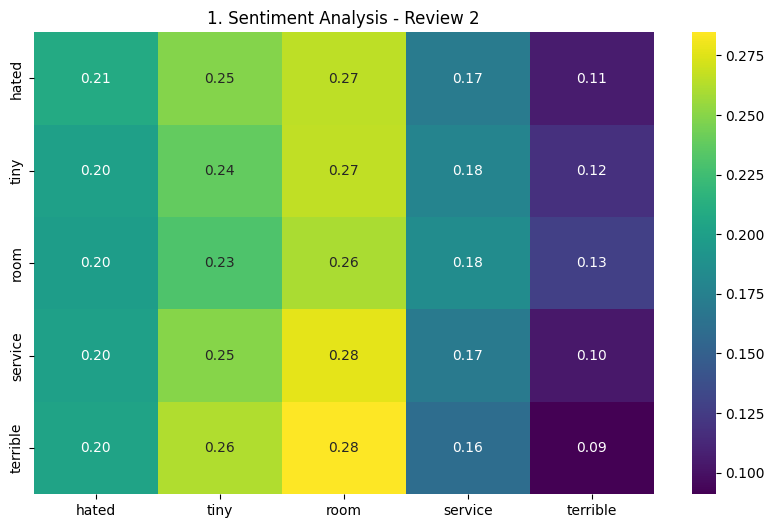

1. Sentiment analysis for review 2

Tokens expressing strong sentiment ('fantastic', 'loved', 'hated', 'terrible') generally receive higher attention weights. This shows that the self-attention mechanism naturally captures the importance of sentiment-carrying words, which is crucial for determining the overall opinion.



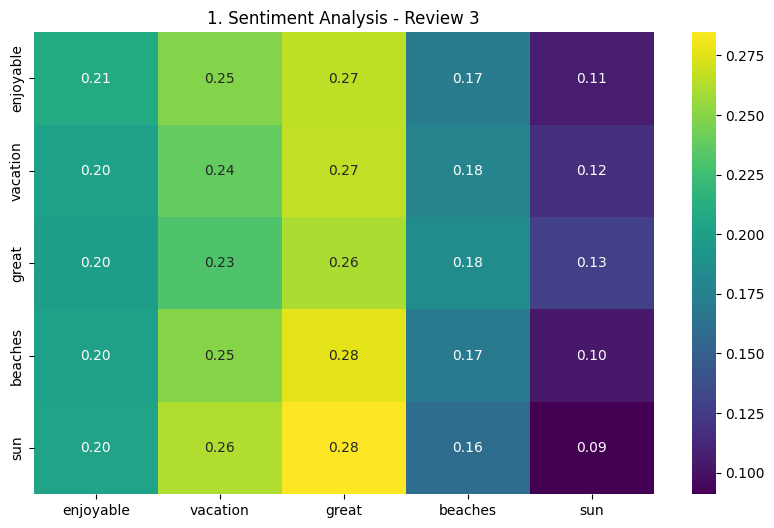

1. Sentiment analysis for review 3

Tokens expressing strong sentiment ('fantastic', 'loved', 'hated', 'terrible') generally receive higher attention weights. This shows that the self-attention mechanism naturally captures the importance of sentiment-carrying words, which is crucial for determining the overall opinion.



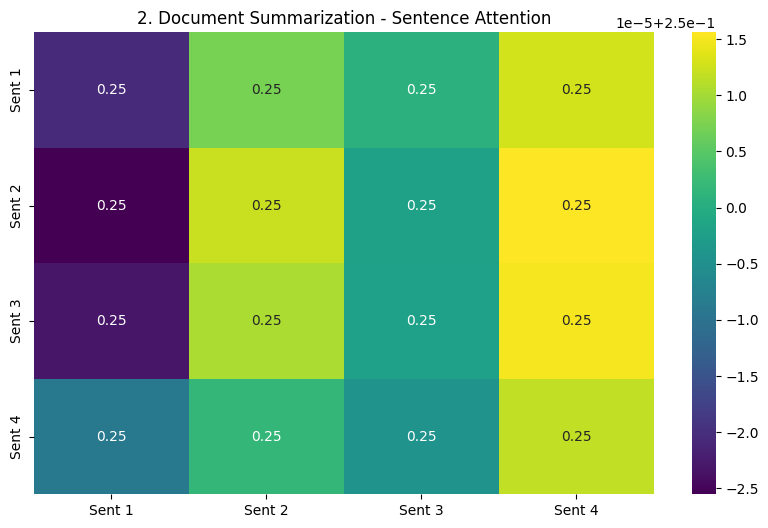

 2. Automatic summarization based on self-attention.

Selected Summary Sentences:
- This attention allows the model to weigh the importance of every word relative to every other word.
- Therefore, summarizing a document often involves identifying sentences with high aggregate attention scores.
Discussion: By calculating attention between sentences, the mechanism identifies sentences that are most 'attended to' by others. These sentences, which typically contain core concepts, are aggregated into the final summary, demonstrating attention's utility in abstractive or extractive summarization.



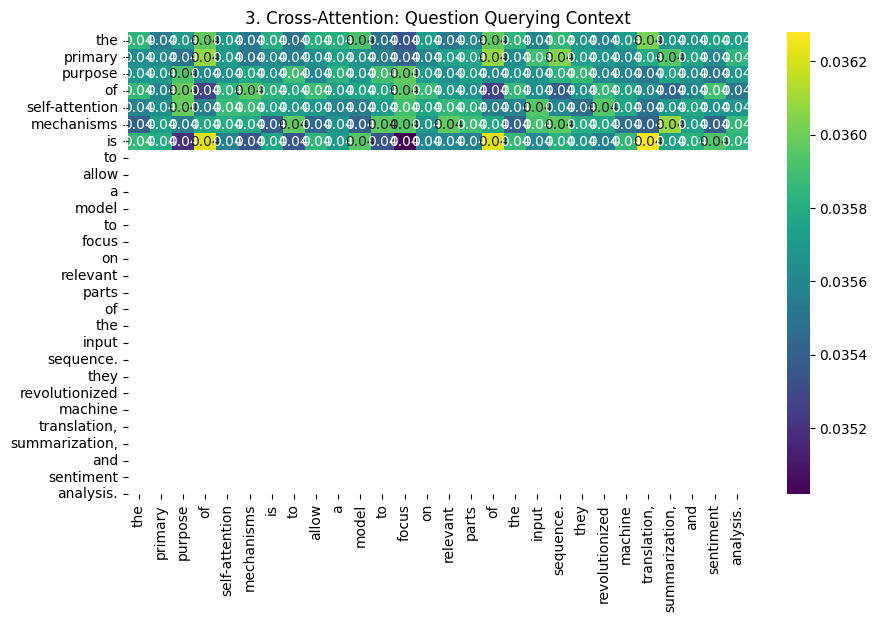

 3. Question-Answering system (Cross-Attention).

In a QA system, cross-attention connects the question (Query rows) with the context (Key/Value columns). High attention between question words like 'function' or 'main' and context words like 'primary purpose' or 'focus' allows the model to dynamically pinpoint the exact sentence or phrase that contains the answer, which is far more effective than reading the whole text sequentially.



In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Utility Functions
def softmax(x):
    # Converts scores into attention probability weights
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def xavier_init(fan_in, fan_out):
    # Initializes weights to ensure stable training
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

def positional_encoding(position, d_model):
    # Adds positional information to embeddings
    PE = np.zeros((position, d_model))
    for pos in range(position):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((i + 1) / d_model)))
    return PE

def self_attention(inputs, Wq, Wk, Wv):
    # Core self-attention computation (Q, K, V)
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)
    scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    return attention_weights, output

def plot_attention_heatmap(att_weights, sentence, title='Attention Heatmap'):
    # Visualization helper function
    plt.figure(figsize=(10,6))
    sns.heatmap(att_weights, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True, fmt=".2f")
    plt.title(title)
    plt.show()


# 1. Sentiment Analysis (Movie reviews)

reviews = [
    "The resort was fantastic and I loved the clear water", # Positive
    "I hated the tiny room and the service was terrible",  # Negative
    "An enjoyable vacation with great beaches and sun"       # Positive
]

embedding_dim = 8
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

for idx, review in enumerate(reviews):
    # Preprocessing: tokenize and remove common stop words
    sentence = review.lower().split()
    sentence = [word for word in sentence if word not in ENGLISH_STOP_WORDS]

    # Generate embeddings (Word2Vec + PE)
    model = Word2Vec([sentence], vector_size=embedding_dim, min_count=1, epochs=100)
    embeddings = np.array([model.wv[word] for word in sentence]) + positional_encoding(len(sentence), embedding_dim)

    # Compute self-attention
    att_weights, output = self_attention(embeddings, Wq, Wk, Wv)

    plot_attention_heatmap(att_weights, sentence, title=f'1. Sentiment Analysis - Review {idx+1}')
    print(f"1. Sentiment analysis for review {idx+1}\n")
    print("Tokens expressing strong sentiment ('fantastic', 'loved', 'hated', 'terrible') generally receive higher attention weights. This shows that the self-attention mechanism naturally captures the importance of sentiment-carrying words, which is crucial for determining the overall opinion.\n")

# 2.  Document Summarization
document = [
    "The Transformer model uses self-attention to process entire sequences at once.",
    "This attention allows the model to weigh the importance of every word relative to every other word.",
    "Attention weights are essential because they highlight key sentences and phrases for summarization tasks.",
    "Therefore, summarizing a document often involves identifying sentences with high aggregate attention scores."
]

embedding_dim = 8
sentence_embeddings = []

# Create one embedding per sentence (average of word embeddings)
for sent in document:
    words = sent.lower().split()
    model = Word2Vec([words], vector_size=embedding_dim, min_count=1, epochs=100)
    word_embs = np.array([model.wv[word] for word in words])
    sentence_emb = word_embs.mean(axis=0)
    sentence_embeddings.append(sentence_emb)

sentence_embeddings = np.array(sentence_embeddings)

att_weights_doc, output_doc = self_attention(sentence_embeddings, Wq, Wk, Wv)
plot_attention_heatmap(att_weights_doc, [f"Sent {i+1}" for i in range(len(document))], title='2. Document Summarization - Sentence Attention')

# Summarization based on attention scores: select top 2 sentences
attention_scores = att_weights_doc.sum(axis=0)
summary_indices = np.argsort(attention_scores)[-2:]
summary = [document[i] for i in summary_indices]

print(" 2. Automatic summarization based on self-attention.\n")
print("Selected Summary Sentences:")
for sent in summary:
    print(f"- {sent}")
print("Discussion: By calculating attention between sentences, the mechanism identifies sentences that are most 'attended to' by others. These sentences, which typically contain core concepts, are aggregated into the final summary, demonstrating attention's utility in abstractive or extractive summarization.\n")

# 3. Question-Answering
context = "The primary purpose of self-attention mechanisms is to allow a model to focus on relevant parts of the input sequence. They revolutionized machine translation, summarization, and sentiment analysis."
question = "What is the main function of self-attention?"

context_words = context.lower().split()
question_words = question.lower().split()

# Generate shared Word2Vec embeddings for context and question
model_ctx = Word2Vec([context_words + question_words], vector_size=embedding_dim, min_count=1, epochs=100)
emb_ctx = np.array([model_ctx.wv[word] for word in context_words])
emb_q = np.array([model_ctx.wv[word] for word in question_words])

# Cross-Attention: Question Q vs Context K/V
# Q (Query) from the Question
Q_q = np.dot(emb_q, Wq)
# K and V (Key/Value) from the Context
K_ctx = np.dot(emb_ctx, Wk)
V_ctx = np.dot(emb_ctx, Wv)

# Compute alignment scores (Cross-Attention)
scores_qa = np.dot(Q_q, K_ctx.T) / np.sqrt(embedding_dim)
attention_weights_qa = softmax(scores_qa)
output_qa = np.dot(attention_weights_qa, V_ctx)

plot_attention_heatmap(attention_weights_qa, context_words, title='3. Cross-Attention: Question Querying Context')

print(" 3. Question-Answering system (Cross-Attention).\n")
print("In a QA system, cross-attention connects the question (Query rows) with the context (Key/Value columns). High attention between question words like 'function' or 'main' and context words like 'primary purpose' or 'focus' allows the model to dynamically pinpoint the exact sentence or phrase that contains the answer, which is far more effective than reading the whole text sequentially.\n")